<span style="color: rgb(22,98,126); font-size: 24px;">**IMPORTAR PAQUETES**</span>

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math

<span style="color: rgb(22,98,126); font-size: 24px;">**FUNCIONES DE AYUDA**</span>

In [5]:
def detectar_outliers(df, columna):
    """
    Función para detectar outliers en una columna de un DataFrame usando el método del rango intercuartílico (IQR).
    
    Parámetros:
    df (pd.DataFrame): DataFrame que contiene los datos.
    columna (str): El nombre de la columna en la que se buscan outliers.
    
    Retorna:
    outliers: una lista con los indices donde se encuentran los outliers
    """
    # Calcular Q1 (primer cuartil) y Q3 (tercer cuartil)
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    
    # Calcular el rango intercuartílico (IQR)
    IQR = Q3 - Q1
    
    # Definir los límites para detectar outliers
    limite_inf = Q1 - 1.5 * IQR
    limite_sup = Q3 + 1.5 * IQR
    
    # Identificar los outliers
    outliers = df[(df[columna] < limite_inf) | (df[columna] > limite_sup)].index.tolist()
    
    # Imprimir los resultados
    print(f"Los Outliers en la columna '{columna}' tiene los indices:\n", outliers)
    
    return outliers


<span style="color: rgb(22,98,126); font-size: 24px;">**CARGA DE DATOS**</span>

In [6]:
df_vel_media_provincia = pd.read_excel('./Datasets/Internet.xlsx', sheet_name = 'Velocidad % por prov')
df_tecnologia_provincia= pd.read_excel('./Datasets/Internet.xlsx', sheet_name = 'Accesos Por Tecnología')
df_penetracion_poblac = pd.read_excel('./Datasets/Internet.xlsx', sheet_name = 'Penetración-poblacion')
df_penetracion_hogar= pd.read_excel('./Datasets/Internet.xlsx', sheet_name = 'Penetracion-hogares')
df_Acceso_rango_provincia  = pd.read_excel('./Datasets/Internet.xlsx', sheet_name = 'Accesos por velocidad')
df_ingresos_total = pd.read_excel('./Datasets/Internet.xlsx', sheet_name = 'Ingresos ')

<span style="color: rgb(22,98,126); font-size: 24px;">**VISUALIZACION Y CREACION DEL DATASET**</span>

<span style="color:  	rgb(59,134,150); font-size: 18px;">**PENETRACION POR HOGAR Y PENETRACION POR HABITANTES**</span>

<span style="color:  	rgb(59,134,150); font-size: 14px;">**PENETRACION POR HOGAR**</span>

In [7]:

#Ver Forma y Caracteristicas de los datasets
print(df_penetracion_hogar.shape)
print(df_penetracion_hogar.info())

(984, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           984 non-null    int64  
 1   Trimestre                     984 non-null    int64  
 2   Provincia                     984 non-null    object 
 3   Accesos por cada 100 hogares  984 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.9+ KB
None


In [8]:
#Revisar si existen cvalores nulos dentro del datasets
df_penetracion_hogar.isnull().sum()

Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64

<span style="color: rgb(94,154,171); font-size: 16px;">**OUTLIERS**</span>

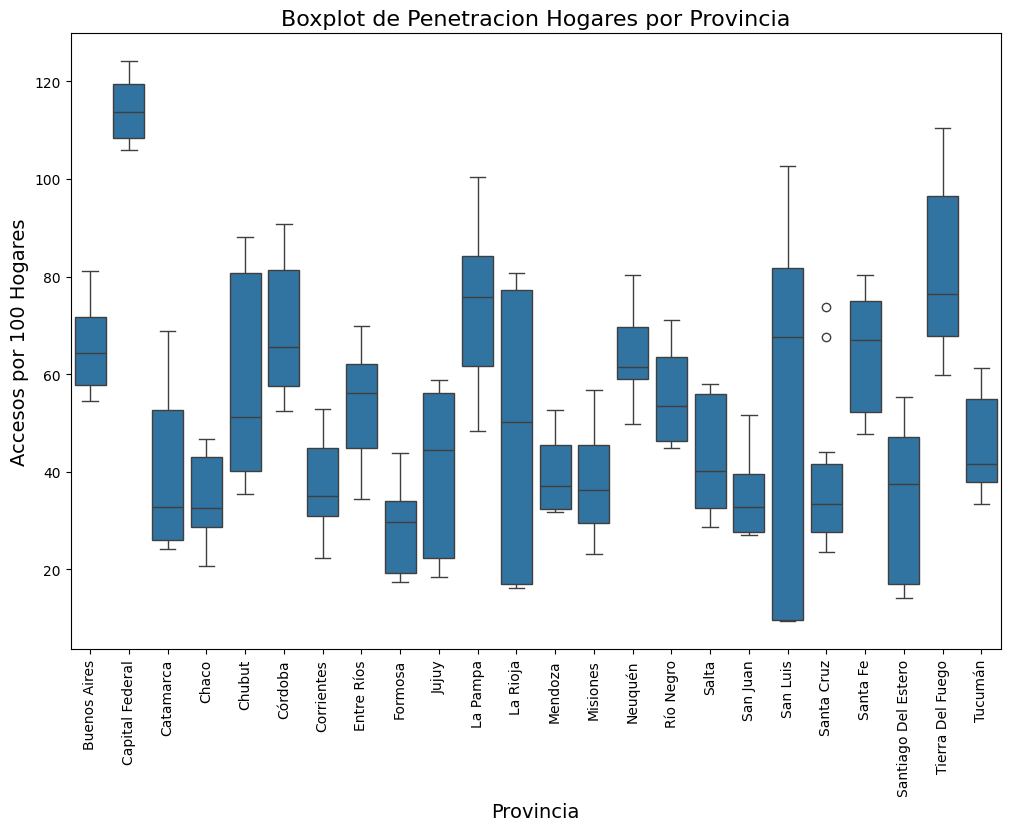

In [9]:
#GRAFICO DE BOXPLOT PARA DETACTAR OUTLIERS 
plt.figure(figsize=(12, 8))
sns.boxplot(x='Provincia', y='Accesos por cada 100 hogares', data=df_penetracion_hogar)

#Títulos y etiquetas
plt.title(f'Boxplot de Penetracion Hogares por Provincia', fontsize=16)
plt.xlabel('Provincia', fontsize=14)
plt.ylabel('Accesos por 100 Hogares', fontsize=14)
plt.xticks(rotation=90)
plt.show()

<span style="color: rgb(22,98,126); font-size: 14x;">**Se observa en las graficas la presencia de Outlier en la Provincia de Santa Cruz. Se utilizara la funcion para calcular outliers e identificarlos**</span>

In [10]:
outliers = detectar_outliers(df_penetracion_hogar[df_penetracion_hogar['Provincia'] == 'Santa Cruz'], 'Accesos por cada 100 hogares')

Los Outliers en la columna 'Accesos por cada 100 hogares' tiene los indices:
 [19, 43]


<span style="color:  	rgb(59,134,150); font-size: 14px;">**PENETRACION POR HABITANTE**</span>

In [11]:
#OBSERVAR TAMANO E INFORMACION DEL DATASET
print(df_penetracion_poblac.shape)
print(df_penetracion_poblac.info())

(984, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       984 non-null    int64  
 1   Trimestre                 984 non-null    int64  
 2   Provincia                 984 non-null    object 
 3   Accesos por cada 100 hab  984 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.9+ KB
None


In [12]:
#DETECCION DE NULOS
df_penetracion_poblac.isnull().sum()

Año                         0
Trimestre                   0
Provincia                   0
Accesos por cada 100 hab    0
dtype: int64

<span style="color: rgb(94,154,171); font-size: 16px;">**OUTLIERS**</span>

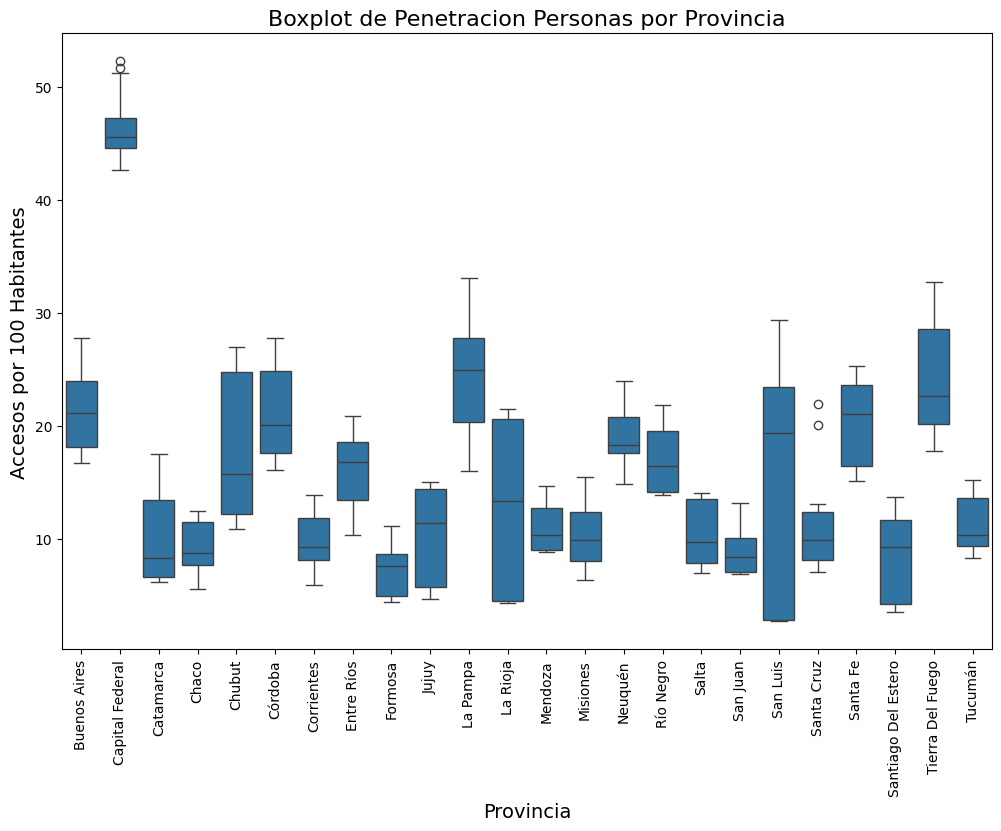

In [13]:
#GRAFICO DE BOXPLOT PARA OBSERVAR OUTLIERS

plt.figure(figsize=(12, 8))
sns.boxplot(x='Provincia', y='Accesos por cada 100 hab', data=df_penetracion_poblac)

#Títulos y etiquetas
plt.title(f'Boxplot de Penetracion Personas por Provincia', fontsize=16)
plt.xlabel('Provincia', fontsize=14)
plt.ylabel('Accesos por 100 Habitantes', fontsize=14)
plt.xticks(rotation=90)
plt.show()

<span style="color: rgb(22,98,126); font-size: 14x;">**Se observa en las graficas la presencia de Outlier en la Provincia de Santa Cruz Y Capital Federal. Se utilizara la funcion para calcular outliers e identificarlos**</span>

In [14]:
detectar_outliers(df_penetracion_poblac[df_penetracion_poblac['Provincia'] == 'Santa Cruz'], 'Accesos por cada 100 hab')
detectar_outliers(df_penetracion_poblac[df_penetracion_poblac['Provincia'] == 'Capital Federal'], 'Accesos por cada 100 hab')

Los Outliers en la columna 'Accesos por cada 100 hab' tiene los indices:
 [19, 43]
Los Outliers en la columna 'Accesos por cada 100 hab' tiene los indices:
 [601, 649]


[601, 649]

In [15]:
## Combinar Columnas Año y Trimestre a columna Fecha tipo datetime
df_penetracion_poblac['Fecha'] = pd.to_datetime(df_penetracion_poblac['Año'].astype(str) + '-' + (df_penetracion_poblac['Trimestre']*3-2).astype(str) + '-1')
df_penetracion_poblac.drop(columns=['Año','Trimestre'], inplace=True)

df_penetracion_hogar['Fecha'] = pd.to_datetime(df_penetracion_hogar['Año'].astype(str) + '-' + (df_penetracion_hogar['Trimestre']*3-2).astype(str) + '-1')
df_penetracion_hogar.drop(columns=['Año','Trimestre'], inplace=True)

<span style="color:  	rgb(59,134,150); font-size: 18px;">**ACCESOS PROVINCIAS POR RANGOS**</span>

In [16]:
print(df_Acceso_rango_provincia.shape)
print(df_Acceso_rango_provincia.info())

(984, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  984 non-null    int64  
 1   Trimestre            984 non-null    int64  
 2   Provincia            984 non-null    object 
 3   HASTA 512 kbps       984 non-null    float64
 4   + 512 Kbps - 1 Mbps  984 non-null    float64
 5   + 1 Mbps - 6 Mbps    984 non-null    float64
 6   + 6 Mbps - 10 Mbps   984 non-null    float64
 7   + 10 Mbps - 20 Mbps  984 non-null    float64
 8   + 20 Mbps - 30 Mbps  984 non-null    float64
 9   + 30 Mbps            984 non-null    float64
 10  OTROS                978 non-null    float64
 11  Total                984 non-null    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 92.4+ KB
None


In [17]:
### Combinar Columnas Año y Trimestre a columna Fecha tipo datetime
df_Acceso_rango_provincia['Fecha'] = pd.to_datetime(df_Acceso_rango_provincia['Año'].astype(str) + '-' + (df_Acceso_rango_provincia['Trimestre']*3-2).astype(str) + '-1')
df_Acceso_rango_provincia.drop(columns=['Año','Trimestre'], inplace=True)


In [18]:
df_Acceso_rango_provincia.isnull().sum()

Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  6
Total                  0
Fecha                  0
dtype: int64

In [19]:
# Se tratan los valores faltantes de la columna 'OTROS' con la media
indices_faltantes = df_Acceso_rango_provincia[df_Acceso_rango_provincia.isnull().any(axis=1)].index.tolist()
df_Acceso_rango_provincia.loc[indices_faltantes,'OTROS'] = round(df_Acceso_rango_provincia['OTROS'].fillna(df_Acceso_rango_provincia['OTROS'].mean()),2)

<span style="color: rgb(94,154,171); font-size: 16px;">**OUTLIERS**</span>


In [20]:
#SE REVISARAN LOS  OUTLIERS POR PROVINCIA

<span style="color: rgb(94,154,171); font-size: 13px;">**BUENOS AIRES**</span>

In [21]:
datos_2 =df_Acceso_rango_provincia[df_Acceso_rango_provincia['Provincia'] == 'Buenos Aires']
datos_2 = datos_2[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps','+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS', 'Total']]

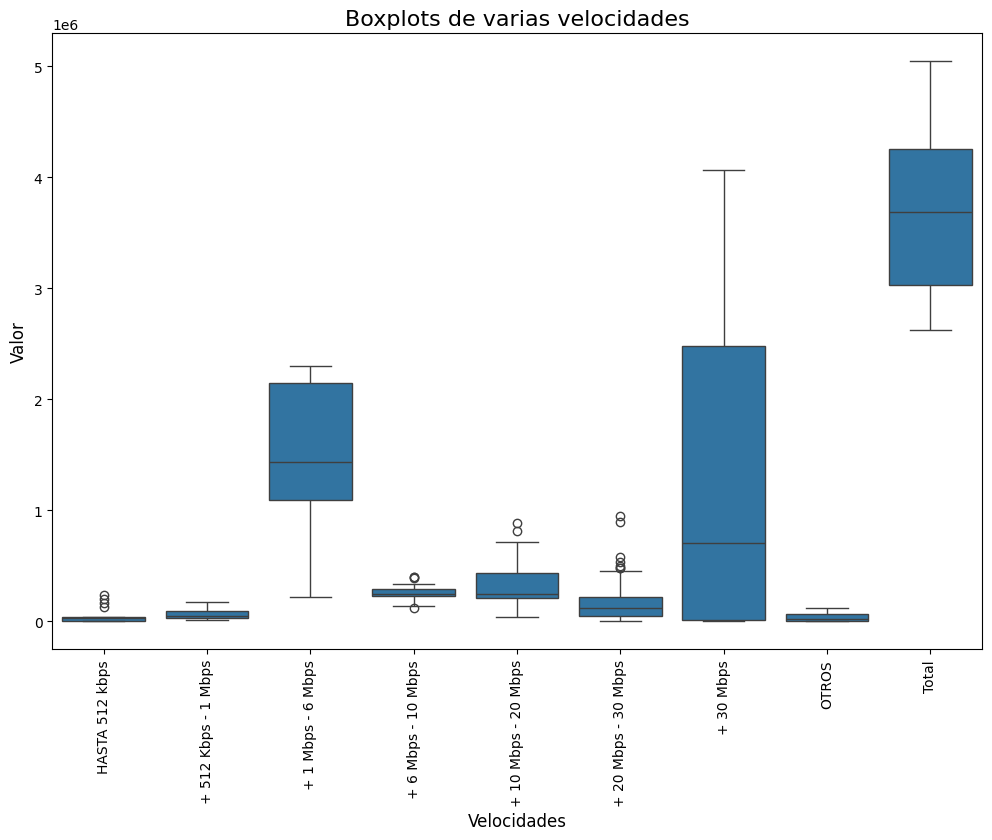

In [22]:
# Crear un DataFrame en formato largo para generar boxplots combinados

df_melted = datos_2.melt()

# Generar un solo gráfico con boxplots de todas las columnas
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=df_melted)

# Añadir títulos y etiquetas
plt.title("Boxplots de varias velocidades", fontsize=16)
plt.xlabel("Velocidades", fontsize=12)
plt.ylabel("Valor", fontsize=12)

# Mostrar el gráfico
plt.xticks(rotation=90)
plt.show()

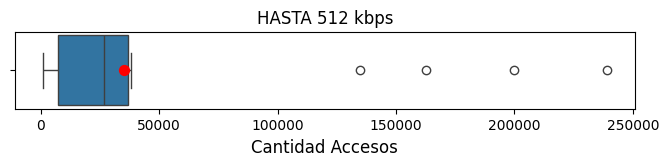

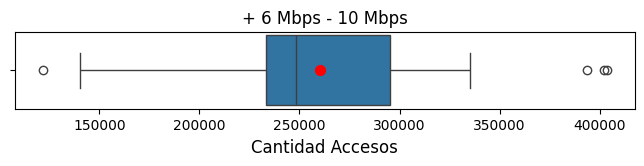

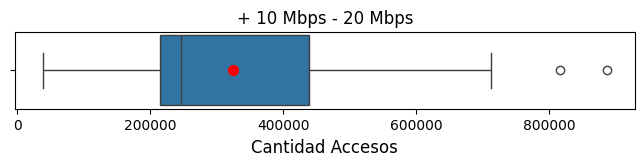

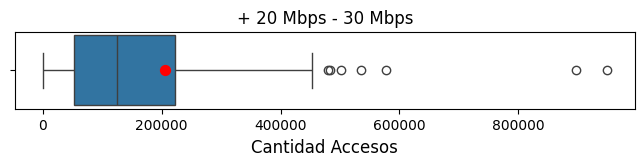

In [23]:
# Graficar boxplots individuales de las velocidades donde existen Outlies para ver que como corregir

plt.figure(figsize=(8, 1))
sns.boxplot(data=datos_2, x='HASTA 512 kbps', orient='h')
media = datos_2['HASTA 512 kbps'].mean()
plt.scatter(media, 0, color='red', label='Media', zorder=3, s=50, marker='o')
plt.xlabel("Cantidad Accesos", fontsize=12)
plt.title('HASTA 512 kbps')
plt.show()

plt.figure(figsize=(8, 1))
sns.boxplot(data=datos_2, x='+ 6 Mbps - 10 Mbps', orient='h')
media = datos_2['+ 6 Mbps - 10 Mbps'].mean()
plt.scatter(media, 0, color='red', label='Media', zorder=3, s=50, marker='o')
plt.xlabel("Cantidad Accesos", fontsize=12)
plt.title('+ 6 Mbps - 10 Mbps')
plt.show()

plt.figure(figsize=(8, 1))
sns.boxplot(data=datos_2, x='+ 10 Mbps - 20 Mbps', orient='h')
media = datos_2['+ 10 Mbps - 20 Mbps'].mean()
plt.scatter(media, 0, color='red', label='Media', zorder=3, s=50, marker='o')
plt.xlabel("Cantidad Accesos", fontsize=12)
plt.title('+ 10 Mbps - 20 Mbps')
plt.show()

plt.figure(figsize=(8, 1))
sns.boxplot(data=datos_2, x='+ 20 Mbps - 30 Mbps', orient='h')
media = datos_2['+ 20 Mbps - 30 Mbps'].mean()
plt.scatter(media, 0, color='red', label='Media', zorder=3, s=50, marker='o')
plt.xlabel("Cantidad Accesos", fontsize=12)
plt.title('+ 20 Mbps - 30 Mbps')
plt.show()


In [24]:
#Separar Data para tratarla segun velocidades
outlines_1 = detectar_outliers(datos_2, 'HASTA 512 kbps')
outlines_2 = detectar_outliers(datos_2, '+ 6 Mbps - 10 Mbps')
outlines_3 = detectar_outliers(datos_2, '+ 10 Mbps - 20 Mbps')
outlines_4 = detectar_outliers(datos_2, '+ 20 Mbps - 30 Mbps')


Los Outliers en la columna 'HASTA 512 kbps' tiene los indices:
 [432, 456, 480, 504]
Los Outliers en la columna '+ 6 Mbps - 10 Mbps' tiene los indices:
 [672, 696, 720, 960]
Los Outliers en la columna '+ 10 Mbps - 20 Mbps' tiene los indices:
 [552, 576]
Los Outliers en la columna '+ 20 Mbps - 30 Mbps' tiene los indices:
 [432, 456, 480, 504, 528, 552, 576]


In [25]:
# Corregir Outliers por la media o mediana, segun sea conveniente segun como se distribuyen los datos
indice = datos_2.index.difference(outlines_1)
df_Acceso_rango_provincia.loc[outlines_1,'HASTA 512 kbps'] = math.floor(datos_2.loc[indice, 'HASTA 512 kbps'].median())

indice = datos_2.index.difference(outlines_2)
df_Acceso_rango_provincia.loc[outlines_2,'+ 6 Mbps - 10 Mbps'] = math.floor(datos_2.loc[indice, '+ 6 Mbps - 10 Mbps'].mean())

indice = datos_2.index.difference(outlines_3)
df_Acceso_rango_provincia.loc[outlines_3,'+ 10 Mbps - 20 Mbps'] = math.floor(datos_2.loc[indice, '+ 10 Mbps - 20 Mbps'].median())

indice = datos_2.index.difference(outlines_4)
df_Acceso_rango_provincia.loc[outlines_4,'+ 20 Mbps - 30 Mbps'] = math.floor(datos_2.loc[indice, '+ 20 Mbps - 30 Mbps'].median())



<span style="color: rgb(94,154,171); font-size: 13px;">**CAPITAL FEDERAL**</span>

In [26]:
# Se realiza el procedimiento anterior en todas las provincias

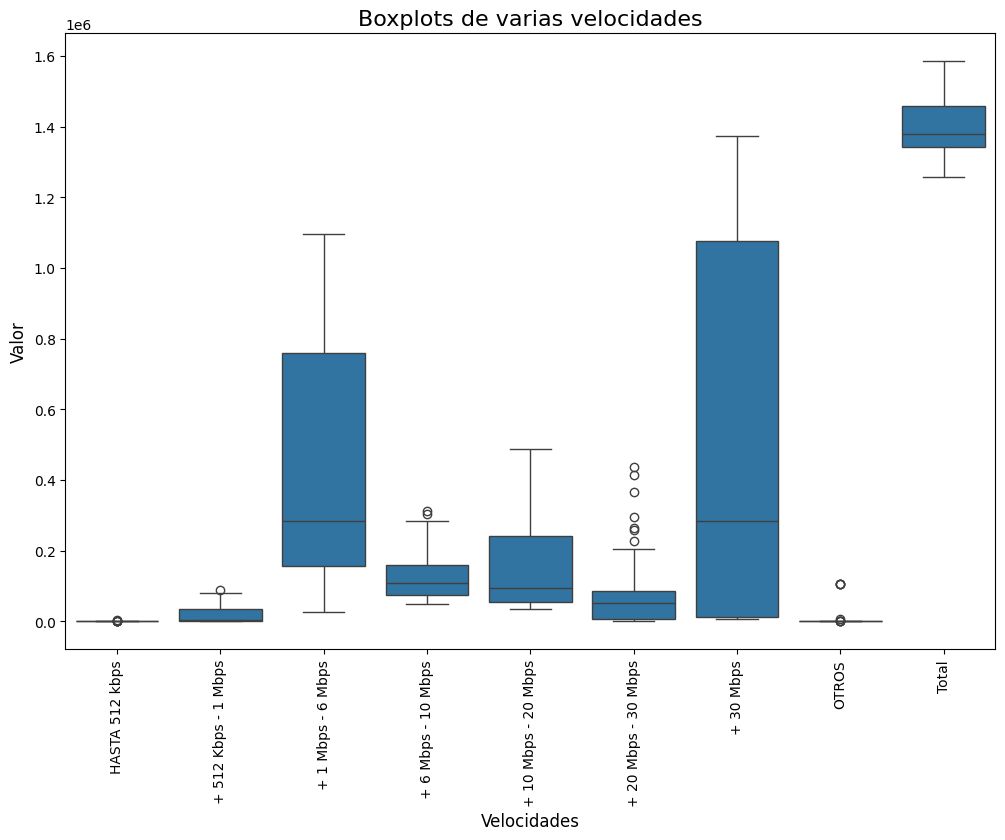

In [27]:
datos_2 =df_Acceso_rango_provincia[df_Acceso_rango_provincia['Provincia'] == 'Capital Federal']
datos_2 = datos_2[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps','+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS', 'Total']]

# Crear un DataFrame en formato largo para generar boxplots combinados

df_melted = datos_2.melt()

# Generar un solo gráfico con boxplots de todas las columnas
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=df_melted)

# Añadir títulos y etiquetas
plt.title("Boxplots de varias velocidades", fontsize=16)
plt.xlabel("Velocidades", fontsize=12)
plt.ylabel("Valor", fontsize=12)

# Mostrar el gráfico
plt.xticks(rotation=90)
plt.show()

In [28]:
outlines_1 = detectar_outliers(datos_2, 'HASTA 512 kbps')
outlines_2 = detectar_outliers(datos_2, '+ 512 Kbps - 1 Mbps')
outlines_3 = detectar_outliers(datos_2, '+ 6 Mbps - 10 Mbps')
outlines_4 = detectar_outliers(datos_2, '+ 20 Mbps - 30 Mbps')
outlines_5 = detectar_outliers(datos_2, 'OTROS')


Los Outliers en la columna 'HASTA 512 kbps' tiene los indices:
 [745, 769, 793, 817, 841, 865, 889]
Los Outliers en la columna '+ 512 Kbps - 1 Mbps' tiene los indices:
 [961]
Los Outliers en la columna '+ 6 Mbps - 10 Mbps' tiene los indices:
 [625, 649]
Los Outliers en la columna '+ 20 Mbps - 30 Mbps' tiene los indices:
 [433, 457, 481, 505, 529, 553, 577]
Los Outliers en la columna 'OTROS' tiene los indices:
 [97, 121, 145, 169, 193, 313, 337, 361, 457]


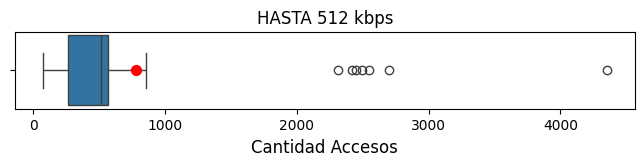

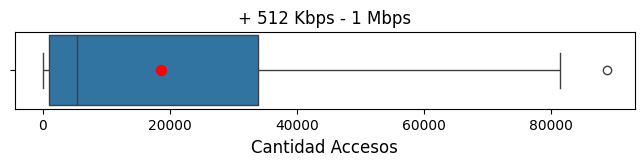

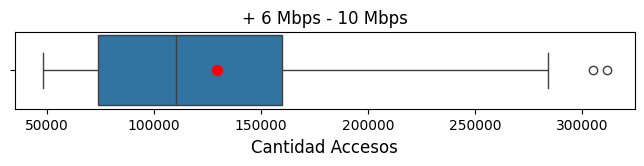

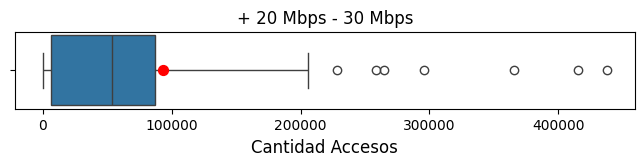

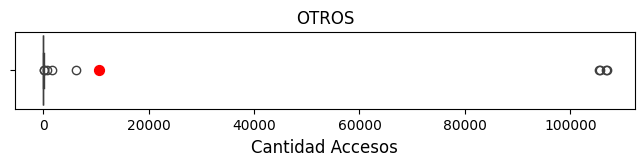

In [29]:
# Graficar boxplot para ver que como corregir los Otliers

plt.figure(figsize=(8, 1))
sns.boxplot(data=datos_2, x='HASTA 512 kbps', orient='h')
media = datos_2['HASTA 512 kbps'].mean()
plt.scatter(media, 0, color='red', label='Media', zorder=3, s=50, marker='o')
plt.xlabel("Cantidad Accesos", fontsize=12)
plt.title('HASTA 512 kbps')
plt.show()

plt.figure(figsize=(8, 1))
sns.boxplot(data=datos_2, x='+ 512 Kbps - 1 Mbps', orient='h')
media = datos_2['+ 512 Kbps - 1 Mbps'].mean()
plt.scatter(media, 0, color='red', label='Media', zorder=3, s=50, marker='o')
plt.xlabel("Cantidad Accesos", fontsize=12)
plt.title('+ 512 Kbps - 1 Mbps')
plt.show()

plt.figure(figsize=(8, 1))
sns.boxplot(data=datos_2, x='+ 6 Mbps - 10 Mbps', orient='h')
media = datos_2['+ 6 Mbps - 10 Mbps'].mean()
plt.scatter(media, 0, color='red', label='Media', zorder=3, s=50, marker='o')
plt.xlabel("Cantidad Accesos", fontsize=12)
plt.title('+ 6 Mbps - 10 Mbps')
plt.show()



plt.figure(figsize=(8, 1))
sns.boxplot(data=datos_2, x='+ 20 Mbps - 30 Mbps', orient='h')
media = datos_2['+ 20 Mbps - 30 Mbps'].mean()
plt.scatter(media, 0, color='red', label='Media', zorder=3, s=50, marker='o')
plt.xlabel("Cantidad Accesos", fontsize=12)
plt.title('+ 20 Mbps - 30 Mbps')
plt.show()


plt.figure(figsize=(8, 1))
sns.boxplot(data=datos_2, x='OTROS', orient='h')
media = datos_2['OTROS'].mean()
plt.scatter(media, 0, color='red', label='Media', zorder=3, s=50, marker='o')
plt.xlabel("Cantidad Accesos", fontsize=12)
plt.title('OTROS')
plt.show()

In [30]:
# Corregir Outliers por la media
indice = datos_2.index.difference(outlines_1)
df_Acceso_rango_provincia.loc[outlines_1,'HASTA 512 kbps'] = math.floor(datos_2.loc[indice, 'HASTA 512 kbps'].median())

indice = datos_2.index.difference(outlines_2)
df_Acceso_rango_provincia.loc[outlines_2,'+ 512 Kbps - 1 Mbps'] = math.floor(datos_2.loc[indice, '+ 512 Kbps - 1 Mbps'].mean())

indice = datos_2.index.difference(outlines_3)
df_Acceso_rango_provincia.loc[outlines_3,'+ 6 Mbps - 10 Mbps'] = math.floor(datos_2.loc[indice, '+ 6 Mbps - 10 Mbps'].median())

indice = datos_2.index.difference(outlines_4)
df_Acceso_rango_provincia.loc[outlines_4,'+ 20 Mbps - 30 Mbps'] = math.floor(datos_2.loc[indice, '+ 20 Mbps - 30 Mbps'].median())

indice = datos_2.index.difference(outlines_5)
df_Acceso_rango_provincia.loc[outlines_5,'OTROS'] = math.floor(datos_2.loc[indice, 'OTROS'].median())



<span style="color: rgb(94,154,171); font-size: 13px;">**CATAMARCA**</span>

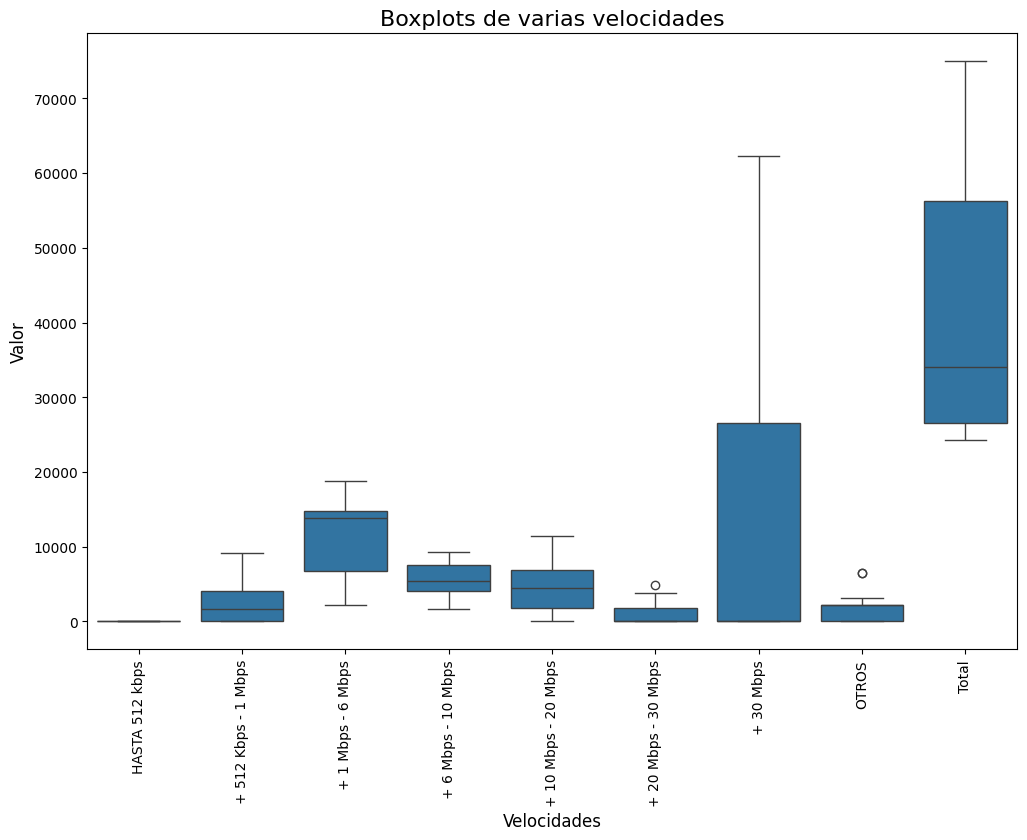

In [31]:
datos_2 =df_Acceso_rango_provincia[df_Acceso_rango_provincia['Provincia'] == 'Catamarca']
datos_2 = datos_2[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps','+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS', 'Total']]

# Crear un DataFrame en formato largo para generar boxplots combinados

df_melted = datos_2.melt()

# Generar un solo gráfico con boxplots de todas las columnas
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=df_melted)

# Añadir títulos y etiquetas
plt.title("Boxplots de varias velocidades", fontsize=16)
plt.xlabel("Velocidades", fontsize=12)
plt.ylabel("Valor", fontsize=12)

# Mostrar el gráfico
plt.xticks(rotation=90)
plt.show()

In [32]:
outlines_1 = detectar_outliers(datos_2, '+ 20 Mbps - 30 Mbps')
outlines_2 = detectar_outliers(datos_2, 'OTROS')

Los Outliers en la columna '+ 20 Mbps - 30 Mbps' tiene los indices:
 [266]
Los Outliers en la columna 'OTROS' tiene los indices:
 [554, 578]


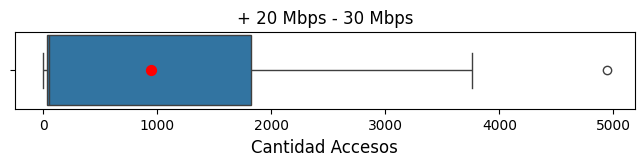

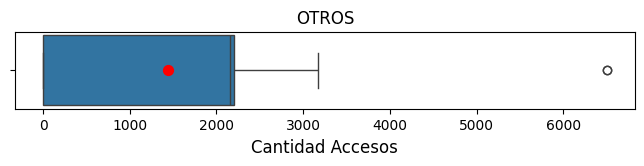

In [33]:
plt.figure(figsize=(8, 1))
sns.boxplot(data=datos_2, x='+ 20 Mbps - 30 Mbps', orient='h')
media = datos_2['+ 20 Mbps - 30 Mbps'].mean()
plt.scatter(media, 0, color='red', label='Media', zorder=3, s=50, marker='o')
plt.xlabel("Cantidad Accesos", fontsize=12)
plt.title('+ 20 Mbps - 30 Mbps')
plt.show()


plt.figure(figsize=(8, 1))
sns.boxplot(data=datos_2, x='OTROS', orient='h')
media = datos_2['OTROS'].mean()
plt.scatter(media, 0, color='red', label='Media', zorder=3, s=50, marker='o')
plt.xlabel("Cantidad Accesos", fontsize=12)
plt.title('OTROS')
plt.show()

In [34]:
indice = datos_2.index.difference(outlines_1)
df_Acceso_rango_provincia.loc[outlines_1,'+ 20 Mbps - 30 Mbps'] = math.floor(datos_2.loc[indice, '+ 20 Mbps - 30 Mbps'].median())

indice = datos_2.index.difference(outlines_2)
df_Acceso_rango_provincia.loc[outlines_2,'OTROS'] = math.floor(datos_2.loc[indice, 'OTROS'].median())

<span style="color: rgb(94,154,171); font-size: 13px;">**CHACO**</span>


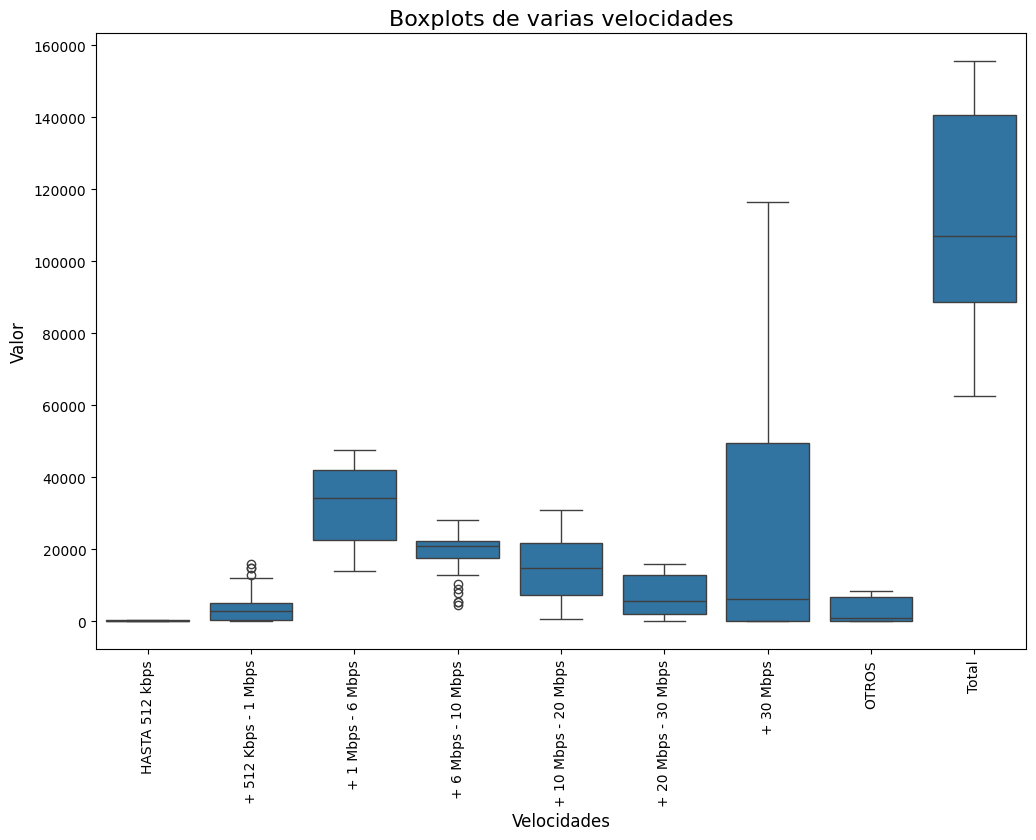

In [35]:
datos_2 =df_Acceso_rango_provincia[df_Acceso_rango_provincia['Provincia'] == 'Chaco']
datos_2 = datos_2[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps','+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS', 'Total']]

# Crear un DataFrame en formato largo para generar boxplots combinados

df_melted = datos_2.melt()

# Generar un solo gráfico con boxplots de todas las columnas
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=df_melted)

# Añadir títulos y etiquetas
plt.title("Boxplots de varias velocidades", fontsize=16)
plt.xlabel("Velocidades", fontsize=12)
plt.ylabel("Valor", fontsize=12)

# Mostrar el gráfico
plt.xticks(rotation=90)
plt.show()

In [36]:
outlines_1 = detectar_outliers(datos_2, '+ 512 Kbps - 1 Mbps')
outlines_2 = detectar_outliers(datos_2, '+ 6 Mbps - 10 Mbps')

Los Outliers en la columna '+ 512 Kbps - 1 Mbps' tiene los indices:
 [891, 915, 939, 963]
Los Outliers en la columna '+ 6 Mbps - 10 Mbps' tiene los indices:
 [3, 27, 891, 915, 939, 963]


In [37]:
## No se Corregiran Outlier ya que al estar al comienzo y al final del periodo, tienen tendencia normal de subida y bajada

<span style="color: rgb(94,154,171); font-size: 13px;">**CHUBUT**</span>

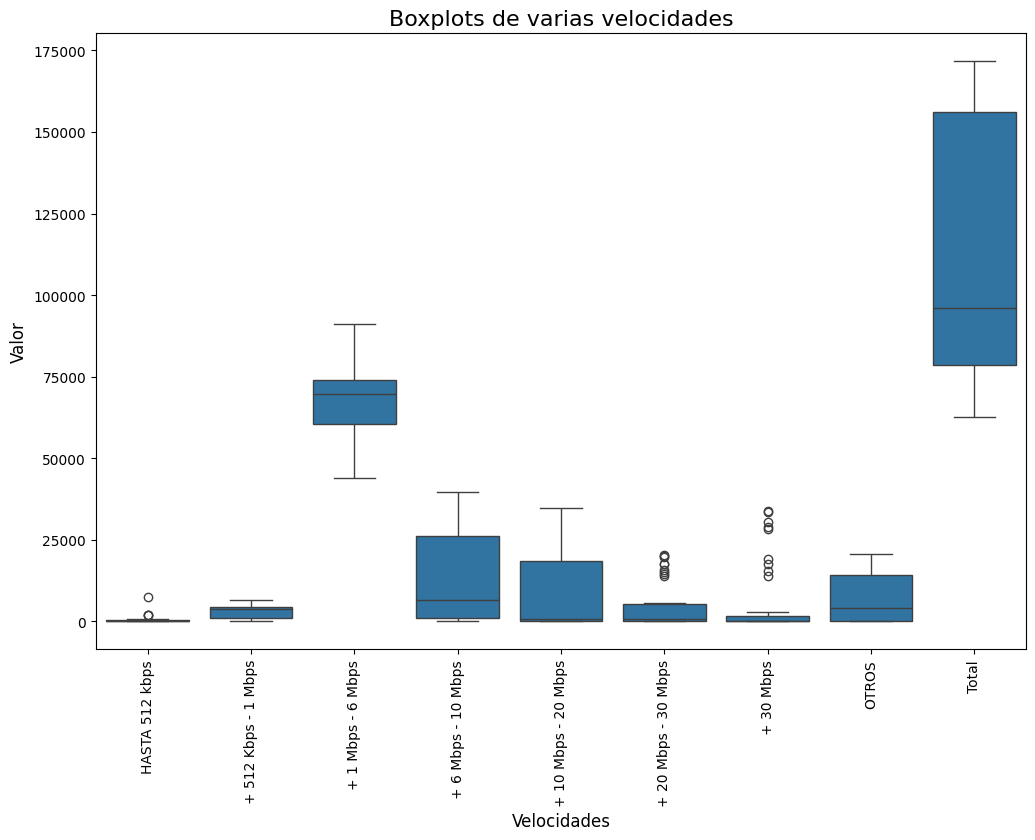

In [38]:
datos_2 =df_Acceso_rango_provincia[df_Acceso_rango_provincia['Provincia'] == 'Chubut']
datos_2 = datos_2[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps','+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS', 'Total']]

# Crear un DataFrame en formato largo para generar boxplots combinados

df_melted = datos_2.melt()

# Generar un solo gráfico con boxplots de todas las columnas
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=df_melted)

# Añadir títulos y etiquetas
plt.title("Boxplots de varias velocidades", fontsize=16)
plt.xlabel("Velocidades", fontsize=12)
plt.ylabel("Valor", fontsize=12)

# Mostrar el gráfico
plt.xticks(rotation=90)
plt.show()

In [39]:
outlines_1 = detectar_outliers(datos_2, 'HASTA 512 kbps')
outlines_2 = detectar_outliers(datos_2, '+ 20 Mbps - 30 Mbps')
outlines_3 = detectar_outliers(datos_2, '+ 30 Mbps')

Los Outliers en la columna 'HASTA 512 kbps' tiene los indices:
 [892, 916, 940, 964]
Los Outliers en la columna '+ 20 Mbps - 30 Mbps' tiene los indices:
 [4, 28, 52, 76, 100, 124, 148, 172, 196]
Los Outliers en la columna '+ 30 Mbps' tiene los indices:
 [4, 28, 52, 76, 100, 124, 148, 172, 196]


In [40]:
# No se Corregiran Outlier ya que al estar al comienzo y al final del periodo, tienen tendencia normal de subida y bajada

<span style="color: rgb(94,154,171); font-size: 13px;">**CORDOBA**</span>

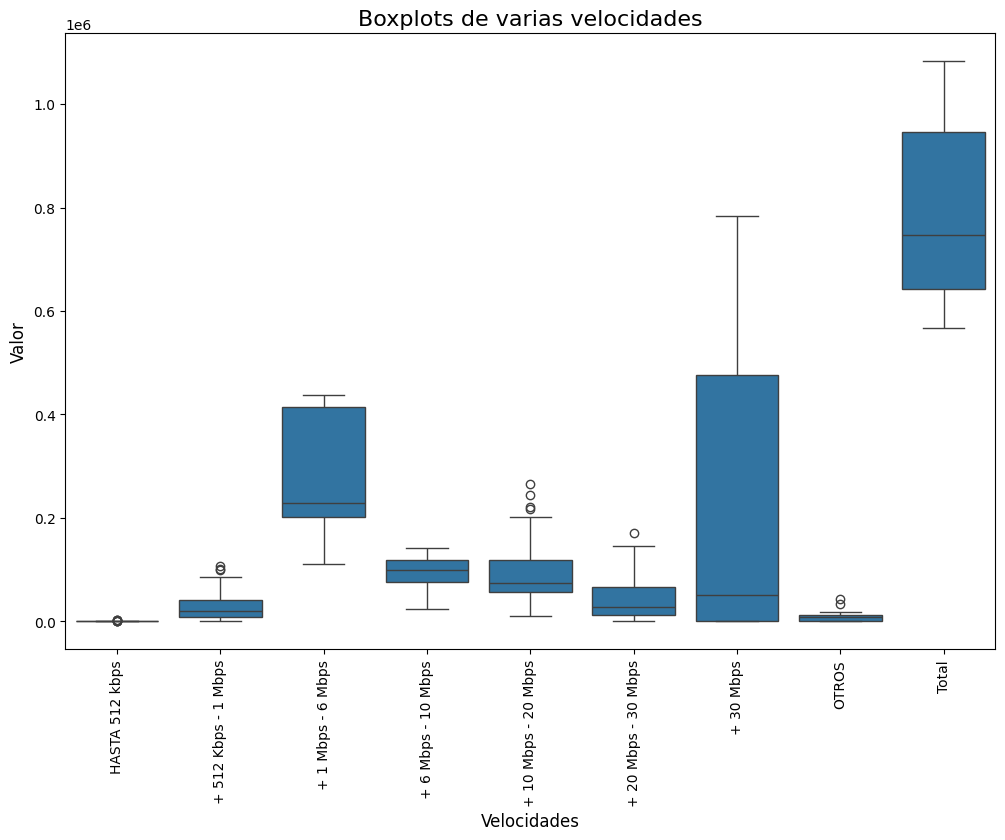

In [41]:
datos_2 =df_Acceso_rango_provincia[df_Acceso_rango_provincia['Provincia'] == 'Córdoba']
datos_2 = datos_2[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps','+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS', 'Total']]

# Crear un DataFrame en formato largo para generar boxplots combinados

df_melted = datos_2.melt()

# Generar un solo gráfico con boxplots de todas las columnas
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=df_melted)

# Añadir títulos y etiquetas
plt.title("Boxplots de varias velocidades", fontsize=16)
plt.xlabel("Velocidades", fontsize=12)
plt.ylabel("Valor", fontsize=12)

# Mostrar el gráfico
plt.xticks(rotation=90)
plt.show()

In [42]:
outlines_1 = detectar_outliers(datos_2, 'HASTA 512 kbps')
outlines_2 = detectar_outliers(datos_2, '+ 512 Kbps - 1 Mbps')
outlines_3 = detectar_outliers(datos_2, '+ 10 Mbps - 20 Mbps')
outlines_4 = detectar_outliers(datos_2, '+ 20 Mbps - 30 Mbps')
outlines_5 = detectar_outliers(datos_2, 'OTROS')

Los Outliers en la columna 'HASTA 512 kbps' tiene los indices:
 [581, 605, 629, 893, 917, 941, 965]
Los Outliers en la columna '+ 512 Kbps - 1 Mbps' tiene los indices:
 [917, 941, 965]
Los Outliers en la columna '+ 10 Mbps - 20 Mbps' tiene los indices:
 [533, 557, 581, 605]
Los Outliers en la columna '+ 20 Mbps - 30 Mbps' tiene los indices:
 [461]
Los Outliers en la columna 'OTROS' tiene los indices:
 [77, 101]


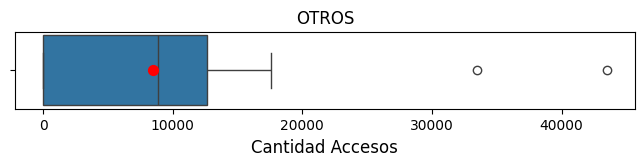

In [43]:
plt.figure(figsize=(8, 1))
sns.boxplot(data=datos_2, x='OTROS', orient='h')
media = datos_2['OTROS'].mean()
plt.scatter(media, 0, color='red', label='Media', zorder=3, s=50, marker='o')
plt.xlabel("Cantidad Accesos", fontsize=12)
plt.title('OTROS')
plt.show()

In [44]:
#se corrige por la media
indice = datos_2.index.difference(outlines_5)
df_Acceso_rango_provincia.loc[outlines_5,'OTROS'] = math.floor(datos_2.loc[indice, 'OTROS'].median())

<span style="color: rgb(94,154,171); font-size: 13px;">**CORRIENTES**</span>

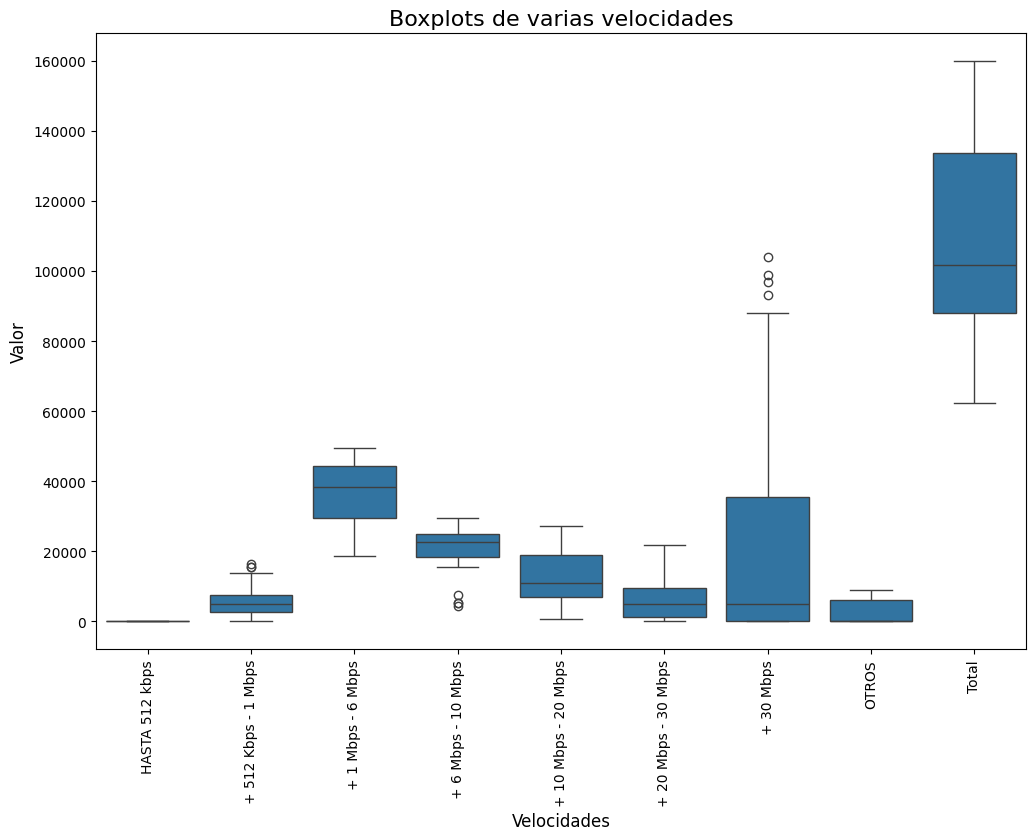

In [45]:
datos_2 =df_Acceso_rango_provincia[df_Acceso_rango_provincia['Provincia'] == 'Corrientes']
datos_2 = datos_2[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps','+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS', 'Total']]

# Crear un DataFrame en formato largo para generar boxplots combinados

df_melted = datos_2.melt()

# Generar un solo gráfico con boxplots de todas las columnas
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=df_melted)

# Añadir títulos y etiquetas
plt.title("Boxplots de varias velocidades", fontsize=16)
plt.xlabel("Velocidades", fontsize=12)
plt.ylabel("Valor", fontsize=12)

# Mostrar el gráfico
plt.xticks(rotation=90)
plt.show()

In [46]:
outlines_1 = detectar_outliers(datos_2, '+ 512 Kbps - 1 Mbps')
outlines_2 = detectar_outliers(datos_2, '+ 6 Mbps - 10 Mbps')
outlines_3 = detectar_outliers(datos_2, '+ 30 Mbps')


Los Outliers en la columna '+ 512 Kbps - 1 Mbps' tiene los indices:
 [918, 942, 966]
Los Outliers en la columna '+ 6 Mbps - 10 Mbps' tiene los indices:
 [894, 918, 942, 966]
Los Outliers en la columna '+ 30 Mbps' tiene los indices:
 [6, 30, 54, 78]


In [47]:
## No se Corregiran Outlier ya que al estar al comienzo y al final del periodo, tienen tendencia normal de subida y bajada

<span style="color: rgb(94,154,171); font-size: 13px;">**ENTRE RIOS**</span>

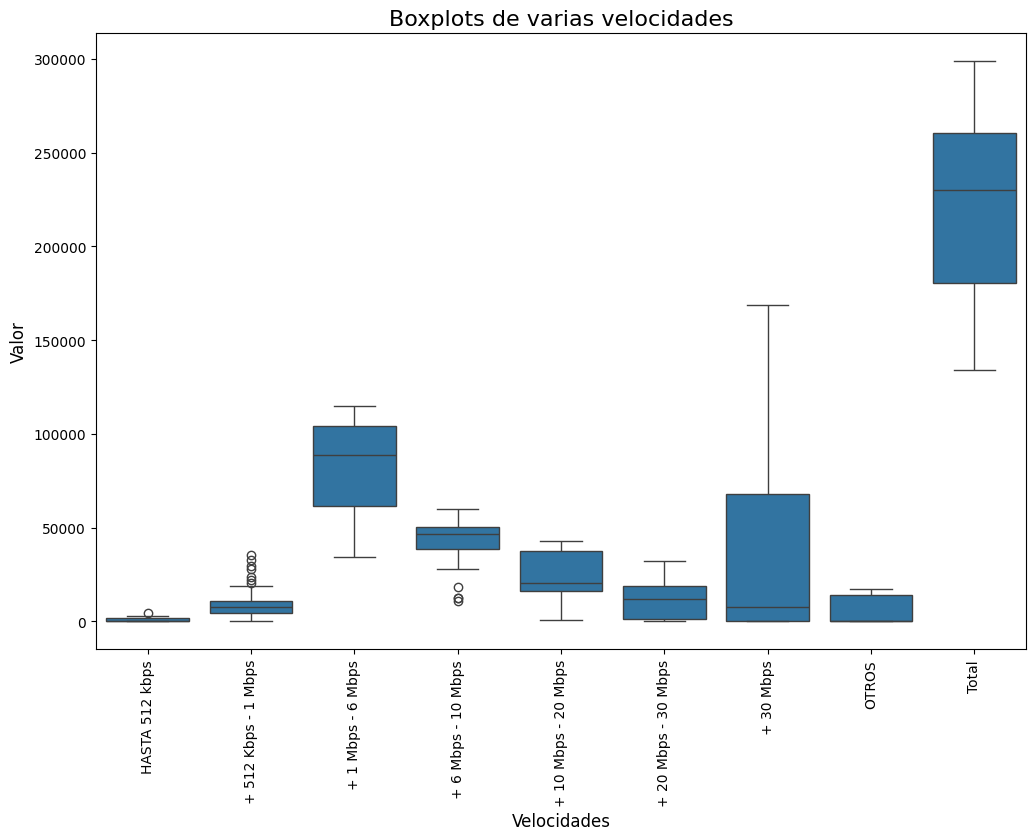

In [48]:
datos_2 =df_Acceso_rango_provincia[df_Acceso_rango_provincia['Provincia'] == 'Entre Ríos']
datos_2 = datos_2[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps','+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS', 'Total']]

# Crear un DataFrame en formato largo para generar boxplots combinados

df_melted = datos_2.melt()

# Generar un solo gráfico con boxplots de todas las columnas
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=df_melted)

# Añadir títulos y etiquetas
plt.title("Boxplots de varias velocidades", fontsize=16)
plt.xlabel("Velocidades", fontsize=12)
plt.ylabel("Valor", fontsize=12)

# Mostrar el gráfico
plt.xticks(rotation=90)
plt.show()


In [49]:
outlines_1 = detectar_outliers(datos_2, 'HASTA 512 kbps')
outlines_2 = detectar_outliers(datos_2, '+ 512 Kbps - 1 Mbps')
outlines_3 = detectar_outliers(datos_2, '+ 6 Mbps - 10 Mbps')


Los Outliers en la columna 'HASTA 512 kbps' tiene los indices:
 [751]
Los Outliers en la columna '+ 512 Kbps - 1 Mbps' tiene los indices:
 [823, 847, 871, 895, 919, 943, 967]
Los Outliers en la columna '+ 6 Mbps - 10 Mbps' tiene los indices:
 [895, 919, 943, 967]


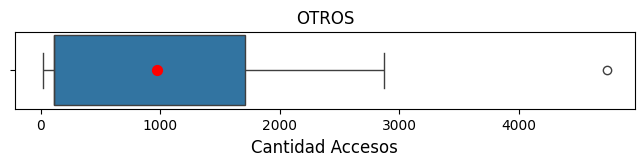

In [50]:
plt.figure(figsize=(8, 1))
sns.boxplot(data=datos_2, x='HASTA 512 kbps', orient='h')
media = datos_2['HASTA 512 kbps'].mean()
plt.scatter(media, 0, color='red', label='Media', zorder=3, s=50, marker='o')
plt.xlabel("Cantidad Accesos", fontsize=12)
plt.title('OTROS')
plt.show()

In [51]:
# como los datos llevan una tendencia, se corregira el outlier con interpolacion
datos_2.loc[outlines_1,'HASTA 512 kbps'] = np.nan
df_Acceso_rango_provincia.loc[outlines_1,'HASTA 512 kbps'] = datos_2["HASTA 512 kbps"].interpolate()

datos_2.loc[415,'+ 512 Kbps - 1 Mbps'] = np.nan 
interpolate =  datos_2['+ 512 Kbps - 1 Mbps'].interpolate()
df_Acceso_rango_provincia.loc[415,'+ 512 Kbps - 1 Mbps'] = interpolate[415]

<span style="color: rgb(94,154,171); font-size: 13px;">**FORMOSA**</span>

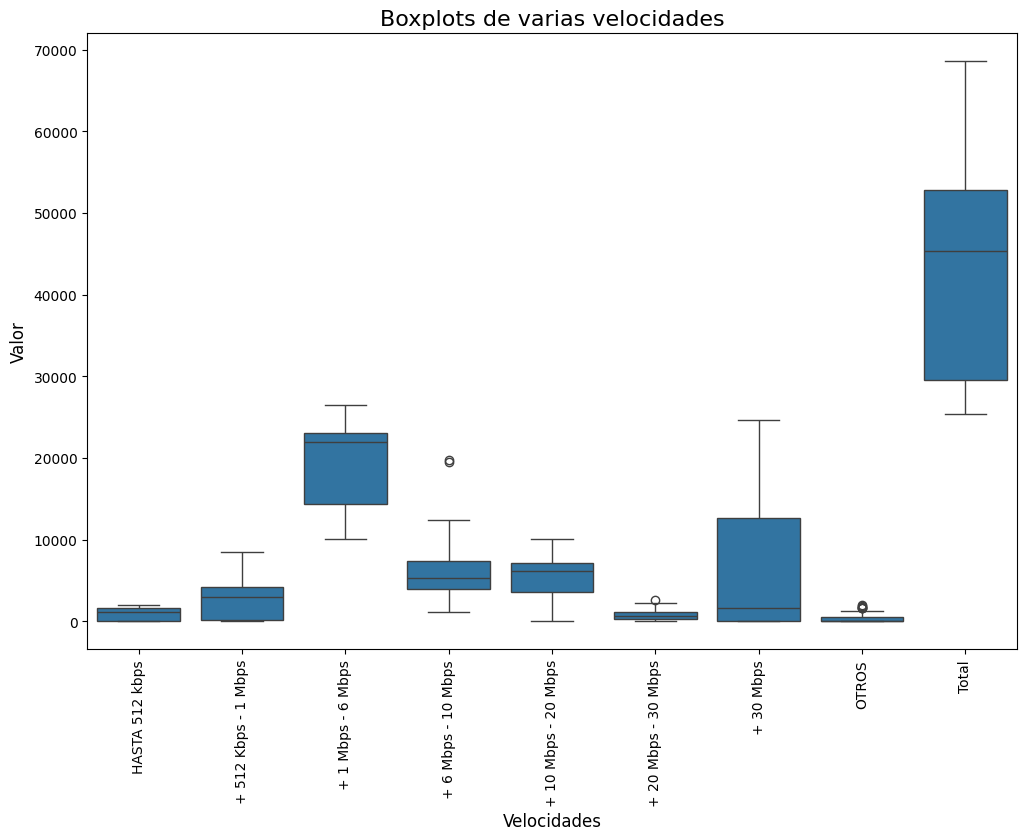

In [52]:
datos_2 =df_Acceso_rango_provincia[df_Acceso_rango_provincia['Provincia'] == 'Formosa']
datos_2 = datos_2[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps','+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS', 'Total']]

# Crear un DataFrame en formato largo para generar boxplots combinados

df_melted = datos_2.melt()

# Generar un solo gráfico con boxplots de todas las columnas
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=df_melted)

# Añadir títulos y etiquetas
plt.title("Boxplots de varias velocidades", fontsize=16)
plt.xlabel("Velocidades", fontsize=12)
plt.ylabel("Valor", fontsize=12)

# Mostrar el gráfico
plt.xticks(rotation=90)
plt.show()


In [53]:

outlines_1 = detectar_outliers(datos_2, '+ 6 Mbps - 10 Mbps')
outlines_2 = detectar_outliers(datos_2, '+ 20 Mbps - 30 Mbps')
outlines_3 = detectar_outliers(datos_2, 'OTROS')


Los Outliers en la columna '+ 6 Mbps - 10 Mbps' tiene los indices:
 [152, 176]
Los Outliers en la columna '+ 20 Mbps - 30 Mbps' tiene los indices:
 [464]
Los Outliers en la columna 'OTROS' tiene los indices:
 [224, 248, 272, 296, 320, 344]


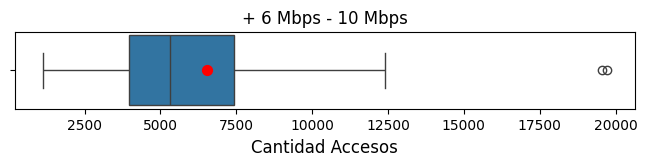

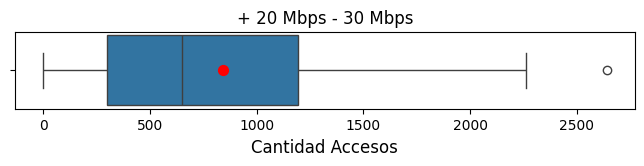

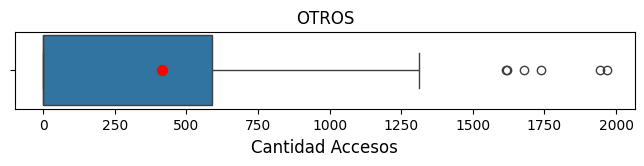

In [54]:

plt.figure(figsize=(8, 1))
sns.boxplot(data=datos_2, x='+ 6 Mbps - 10 Mbps', orient='h')
media = datos_2['+ 6 Mbps - 10 Mbps'].mean()
plt.scatter(media, 0, color='red', label='Media', zorder=3, s=50, marker='o')
plt.xlabel("Cantidad Accesos", fontsize=12)
plt.title('+ 6 Mbps - 10 Mbps')
plt.show()

plt.figure(figsize=(8, 1))
sns.boxplot(data=datos_2, x='+ 20 Mbps - 30 Mbps', orient='h')
media = datos_2['+ 20 Mbps - 30 Mbps'].mean()
plt.scatter(media, 0, color='red', label='Media', zorder=3, s=50, marker='o')
plt.xlabel("Cantidad Accesos", fontsize=12)
plt.title('+ 20 Mbps - 30 Mbps')
plt.show()

plt.figure(figsize=(8, 1))
sns.boxplot(data=datos_2, x='OTROS', orient='h')
media = datos_2['OTROS'].mean()
plt.scatter(media, 0, color='red', label='Media', zorder=3, s=50, marker='o')
plt.xlabel("Cantidad Accesos", fontsize=12)
plt.title('OTROS')
plt.show()

In [55]:
indice = datos_2.index.difference(outlines_1)
df_Acceso_rango_provincia.loc[outlines_1,'+ 6 Mbps - 10 Mbps'] = math.floor(datos_2.loc[indice, '+ 6 Mbps - 10 Mbps'].median())

indice = datos_2.index.difference(outlines_3)
df_Acceso_rango_provincia.loc[outlines_3,'OTROS'] = math.floor(datos_2.loc[indice, 'OTROS'].median())

<span style="color: rgb(94,154,171); font-size: 13px;">**JUJUY**</span>

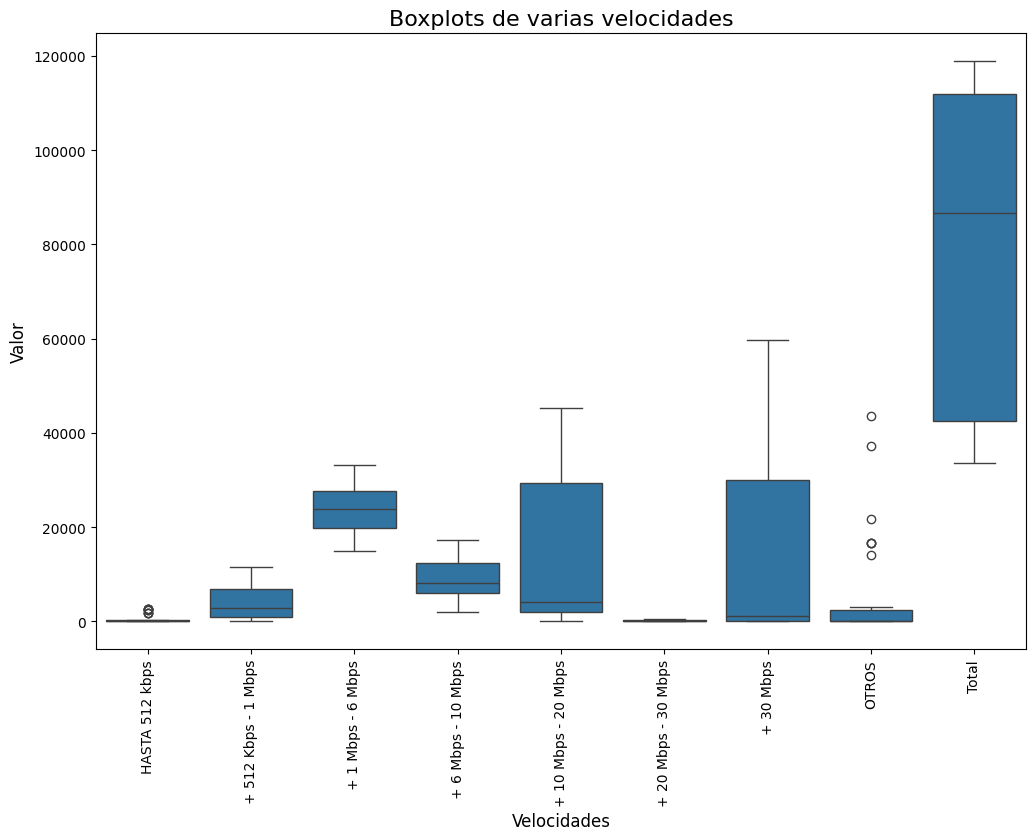

In [56]:
datos_2 =df_Acceso_rango_provincia[df_Acceso_rango_provincia['Provincia'] == 'Jujuy']
datos_2 = datos_2[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps','+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS', 'Total']]

# Crear un DataFrame en formato largo para generar boxplots combinados

df_melted = datos_2.melt()

# Generar un solo gráfico con boxplots de todas las columnas
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=df_melted)

# Añadir títulos y etiquetas
plt.title("Boxplots de varias velocidades", fontsize=16)
plt.xlabel("Velocidades", fontsize=12)
plt.ylabel("Valor", fontsize=12)

# Mostrar el gráfico
plt.xticks(rotation=90)
plt.show()

In [57]:
outlines_1 = detectar_outliers(datos_2, 'HASTA 512 kbps')
outlines_5 = detectar_outliers(datos_2, 'OTROS')

Los Outliers en la columna 'HASTA 512 kbps' tiene los indices:
 [753, 777, 801, 825, 849, 873, 897, 945, 969]
Los Outliers en la columna 'OTROS' tiene los indices:
 [369, 393, 417, 441, 465, 489, 513]


In [58]:
indice = datos_2.index.difference(outlines_5)
df_Acceso_rango_provincia.loc[outlines_5,'OTROS'] = math.floor(datos_2.loc[indice, 'OTROS'].median())

<span style="color: rgb(94,154,171); font-size: 13px;">**LA PAMPA**</span>

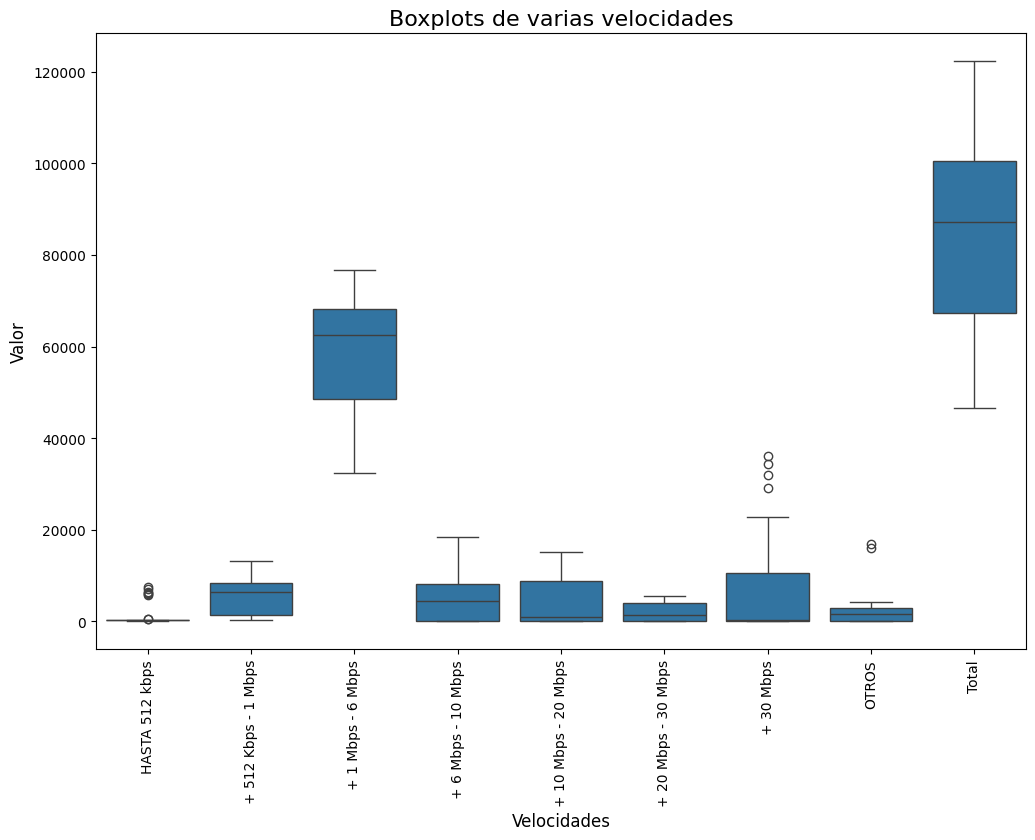

In [59]:
datos_2 =df_Acceso_rango_provincia[df_Acceso_rango_provincia['Provincia'] == 'La Pampa']
datos_2 = datos_2[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps','+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS', 'Total']]

# Crear un DataFrame en formato largo para generar boxplots combinados

df_melted = datos_2.melt()

# Generar un solo gráfico con boxplots de todas las columnas
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=df_melted)

# Añadir títulos y etiquetas
plt.title("Boxplots de varias velocidades", fontsize=16)
plt.xlabel("Velocidades", fontsize=12)
plt.ylabel("Valor", fontsize=12)

# Mostrar el gráfico
plt.xticks(rotation=90)
plt.show()

In [60]:
outlines_1 = detectar_outliers(datos_2, 'HASTA 512 kbps')
outlines_4 = detectar_outliers(datos_2, '+ 30 Mbps')
outlines_5 = detectar_outliers(datos_2, 'OTROS')

Los Outliers en la columna 'HASTA 512 kbps' tiene los indices:
 [802, 826, 850, 874, 898, 922, 946, 970]
Los Outliers en la columna '+ 30 Mbps' tiene los indices:
 [10, 34, 58, 82]
Los Outliers en la columna 'OTROS' tiene los indices:
 [106, 130]


In [61]:
indice = datos_2.index.difference(outlines_5)
df_Acceso_rango_provincia.loc[outlines_5,'OTROS'] = math.floor(datos_2.loc[indice, 'OTROS'].median())

<span style="color: rgb(94,154,171); font-size: 13px;">**LA RIOJA**</span>

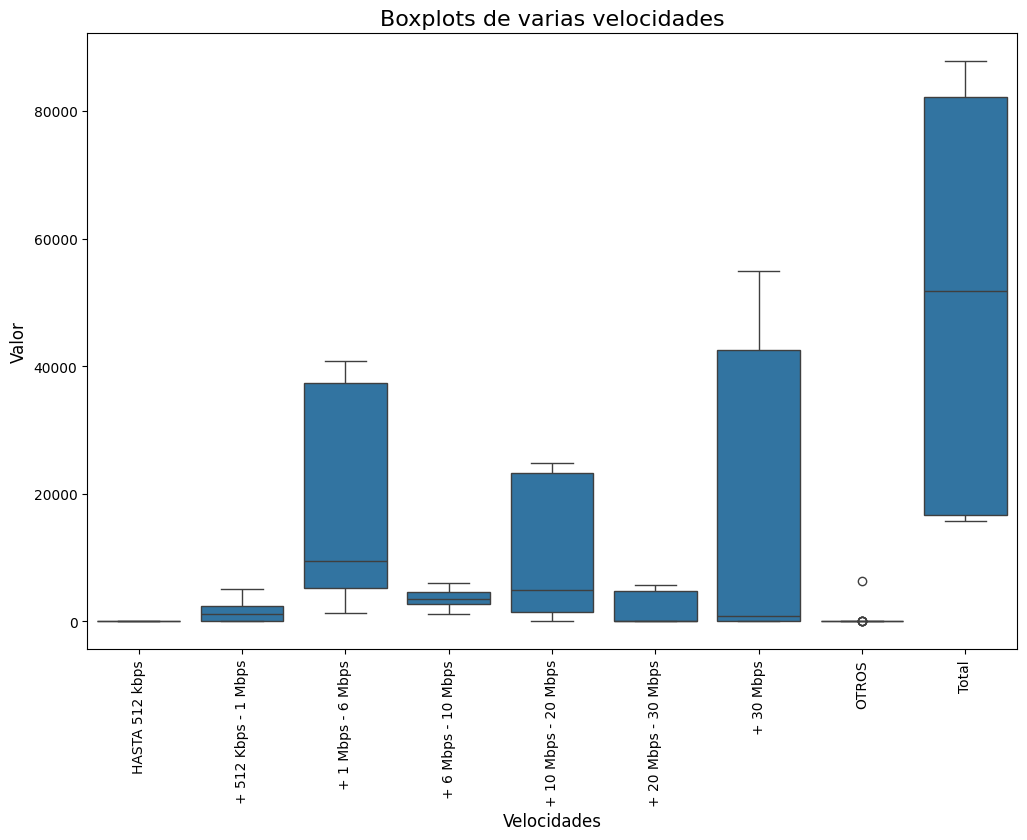

In [62]:
datos_2 =df_Acceso_rango_provincia[df_Acceso_rango_provincia['Provincia'] == 'La Rioja']
datos_2 = datos_2[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps','+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS', 'Total']]

# Crear un DataFrame en formato largo para generar boxplots combinados

df_melted = datos_2.melt()

# Generar un solo gráfico con boxplots de todas las columnas
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=df_melted)

# Añadir títulos y etiquetas
plt.title("Boxplots de varias velocidades", fontsize=16)
plt.xlabel("Velocidades", fontsize=12)
plt.ylabel("Valor", fontsize=12)

# Mostrar el gráfico
plt.xticks(rotation=90)
plt.show()

In [63]:
outlines_5 = detectar_outliers(datos_2, 'OTROS')

Los Outliers en la columna 'OTROS' tiene los indices:
 [275, 299, 347, 371, 467, 515]


In [64]:
indice = datos_2.index.difference(outlines_5)
df_Acceso_rango_provincia.loc[outlines_5,'OTROS'] = math.floor(datos_2.loc[indice, 'OTROS'].median())

<span style="color: rgb(94,154,171); font-size: 13px;">**MENDOZA**</span>

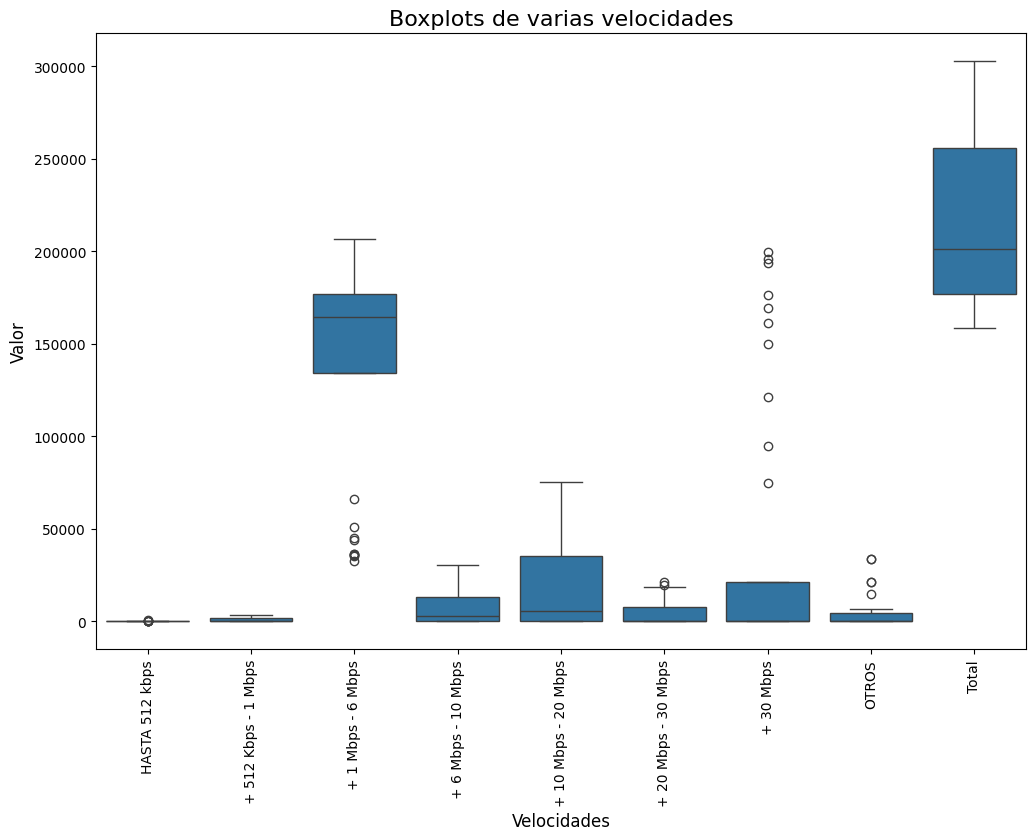

In [65]:
datos_2 =df_Acceso_rango_provincia[df_Acceso_rango_provincia['Provincia'] == 'Mendoza']
datos_2 = datos_2[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps','+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS', 'Total']]

# Crear un DataFrame en formato largo para generar boxplots combinados

df_melted = datos_2.melt()

# Generar un solo gráfico con boxplots de todas las columnas
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=df_melted)

# Añadir títulos y etiquetas
plt.title("Boxplots de varias velocidades", fontsize=16)
plt.xlabel("Velocidades", fontsize=12)
plt.ylabel("Valor", fontsize=12)

# Mostrar el gráfico
plt.xticks(rotation=90)
plt.show()

In [66]:
outlines_1 = detectar_outliers(datos_2, 'HASTA 512 kbps')
outlines_2 = detectar_outliers(datos_2, '+ 1 Mbps - 6 Mbps')
outlines_3 = detectar_outliers(datos_2, '+ 20 Mbps - 30 Mbps')
outlines_4 = detectar_outliers(datos_2, '+ 30 Mbps')
outlines_5 = detectar_outliers(datos_2, 'OTROS')

Los Outliers en la columna 'HASTA 512 kbps' tiene los indices:
 [420, 756, 804, 828, 852, 876, 900]
Los Outliers en la columna '+ 1 Mbps - 6 Mbps' tiene los indices:
 [12, 36, 60, 84, 108, 132, 156, 180, 204, 228]
Los Outliers en la columna '+ 20 Mbps - 30 Mbps' tiene los indices:
 [180, 204]
Los Outliers en la columna '+ 30 Mbps' tiene los indices:
 [12, 36, 60, 84, 108, 132, 156, 180, 204, 228]
Los Outliers en la columna 'OTROS' tiene los indices:
 [84, 108, 132, 564, 588]


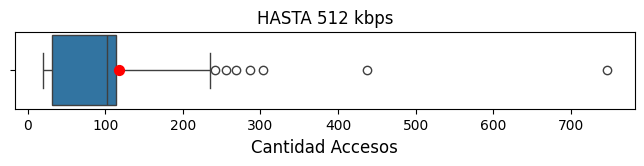

In [67]:

plt.figure(figsize=(8, 1))
sns.boxplot(data=datos_2, x='HASTA 512 kbps', orient='h')
media = datos_2['HASTA 512 kbps'].mean()
plt.scatter(media, 0, color='red', label='Media', zorder=3, s=50, marker='o')
plt.xlabel("Cantidad Accesos", fontsize=12)
plt.title('HASTA 512 kbps')
plt.show()



In [68]:
indice = datos_2.index.difference(outlines_1)
df_Acceso_rango_provincia.loc[outlines_1,'HASTA 512 kbps'] = math.floor(datos_2.loc[indice, 'HASTA 512 kbps'].median())


<span style="color: rgb(94,154,171); font-size: 13px;">**MISIONES**</span>

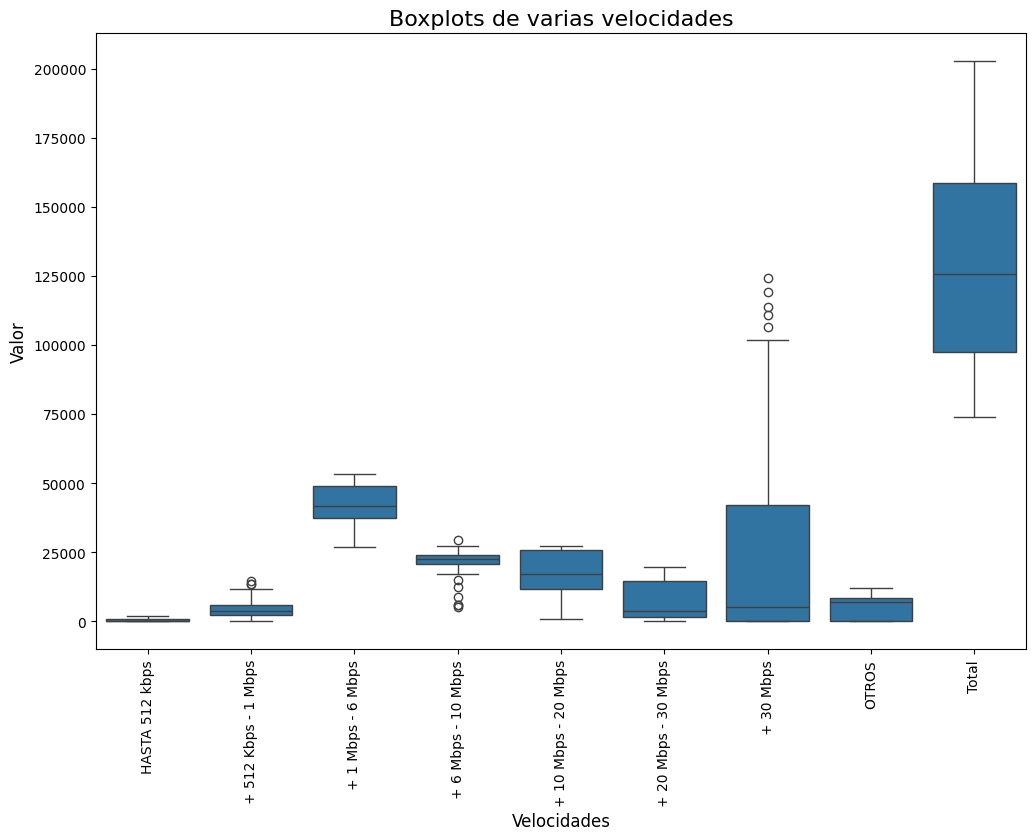

In [69]:
datos_2 =df_Acceso_rango_provincia[df_Acceso_rango_provincia['Provincia'] == 'Misiones']
datos_2 = datos_2[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps','+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS', 'Total']]

# Crear un DataFrame en formato largo para generar boxplots combinados

df_melted = datos_2.melt()

# Generar un solo gráfico con boxplots de todas las columnas
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=df_melted)

# Añadir títulos y etiquetas
plt.title("Boxplots de varias velocidades", fontsize=16)
plt.xlabel("Velocidades", fontsize=12)
plt.ylabel("Valor", fontsize=12)

# Mostrar el gráfico
plt.xticks(rotation=90)
plt.show()

In [70]:
outlines_1 = detectar_outliers(datos_2, '+ 512 Kbps - 1 Mbps')
outlines_2 = detectar_outliers(datos_2, '+ 6 Mbps - 10 Mbps')
outlines_3 = detectar_outliers(datos_2, '+ 30 Mbps')

Los Outliers en la columna '+ 512 Kbps - 1 Mbps' tiene los indices:
 [925, 949, 973]
Los Outliers en la columna '+ 6 Mbps - 10 Mbps' tiene los indices:
 [445, 853, 877, 901, 925, 949, 973]
Los Outliers en la columna '+ 30 Mbps' tiene los indices:
 [13, 37, 61, 85, 109]


In [71]:
# No se Corregiran Outlier ya que al estar al comienzo y al final del periodo, tienen tendencia normal de subida y bajada

<span style="color: rgb(94,154,171); font-size: 13px;">**NEUQUEN**</span>

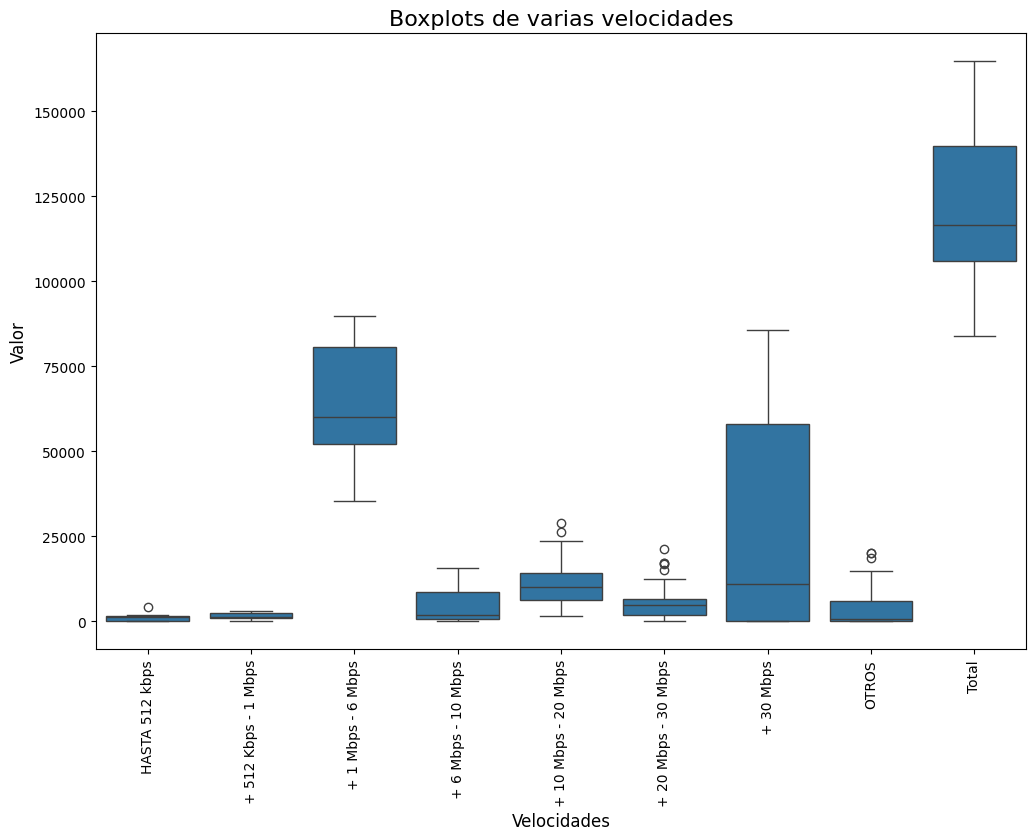

In [72]:
datos_2 =df_Acceso_rango_provincia[df_Acceso_rango_provincia['Provincia'] == 'Neuquén']
datos_2 = datos_2[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps','+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS', 'Total']]

# Crear un DataFrame en formato largo para generar boxplots combinados

df_melted = datos_2.melt()

# Generar un solo gráfico con boxplots de todas las columnas
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=df_melted)

# Añadir títulos y etiquetas
plt.title("Boxplots de varias velocidades", fontsize=16)
plt.xlabel("Velocidades", fontsize=12)
plt.ylabel("Valor", fontsize=12)

# Mostrar el gráfico
plt.xticks(rotation=90)
plt.show()

In [73]:
outlines_1 = detectar_outliers(datos_2, 'HASTA 512 kbps')
outlines_2 = detectar_outliers(datos_2, '+ 10 Mbps - 20 Mbps')
outlines_3 = detectar_outliers(datos_2, '+ 20 Mbps - 30 Mbps')
outlines_5 = detectar_outliers(datos_2, 'OTROS')

Los Outliers en la columna 'HASTA 512 kbps' tiene los indices:
 [974]
Los Outliers en la columna '+ 10 Mbps - 20 Mbps' tiene los indices:
 [566, 590]
Los Outliers en la columna '+ 20 Mbps - 30 Mbps' tiene los indices:
 [446, 470, 494, 518, 542]
Los Outliers en la columna 'OTROS' tiene los indices:
 [14, 38, 182]


<span style="color: rgb(94,154,171); font-size: 13px;">**RIO NEGRO**</span>

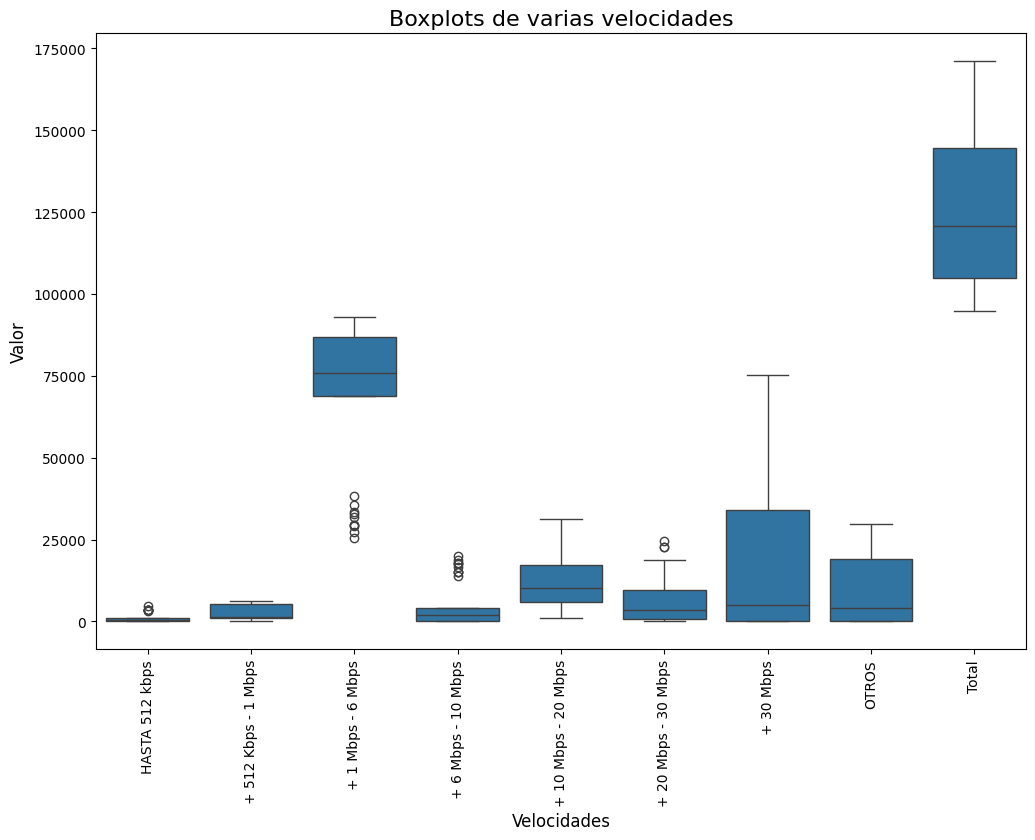

In [74]:
datos_2 =df_Acceso_rango_provincia[df_Acceso_rango_provincia['Provincia'] == 'Río Negro']
datos_2 = datos_2[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps','+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS', 'Total']]

# Crear un DataFrame en formato largo para generar boxplots combinados

df_melted = datos_2.melt()

# Generar un solo gráfico con boxplots de todas las columnas
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=df_melted)

# Añadir títulos y etiquetas
plt.title("Boxplots de varias velocidades", fontsize=16)
plt.xlabel("Velocidades", fontsize=12)
plt.ylabel("Valor", fontsize=12)

# Mostrar el gráfico
plt.xticks(rotation=90)
plt.show()

In [75]:
outlines_1 = detectar_outliers(datos_2, 'HASTA 512 kbps')
outlines_2 = detectar_outliers(datos_2, '+ 1 Mbps - 6 Mbps')
outlines_3 = detectar_outliers(datos_2, '+ 6 Mbps - 10 Mbps')
outlines_5 = detectar_outliers(datos_2, '+ 20 Mbps - 30 Mbps')

Los Outliers en la columna 'HASTA 512 kbps' tiene los indices:
 [807, 831, 855, 879, 903, 927, 951, 975]
Los Outliers en la columna '+ 1 Mbps - 6 Mbps' tiene los indices:
 [15, 39, 63, 87, 111, 135, 159, 183, 207, 231]
Los Outliers en la columna '+ 6 Mbps - 10 Mbps' tiene los indices:
 [15, 39, 63, 87, 111, 135, 159, 183, 207, 231]
Los Outliers en la columna '+ 20 Mbps - 30 Mbps' tiene los indices:
 [39, 63, 87]


<span style="color: rgb(94,154,171); font-size: 13px;">**SALTA**</span>

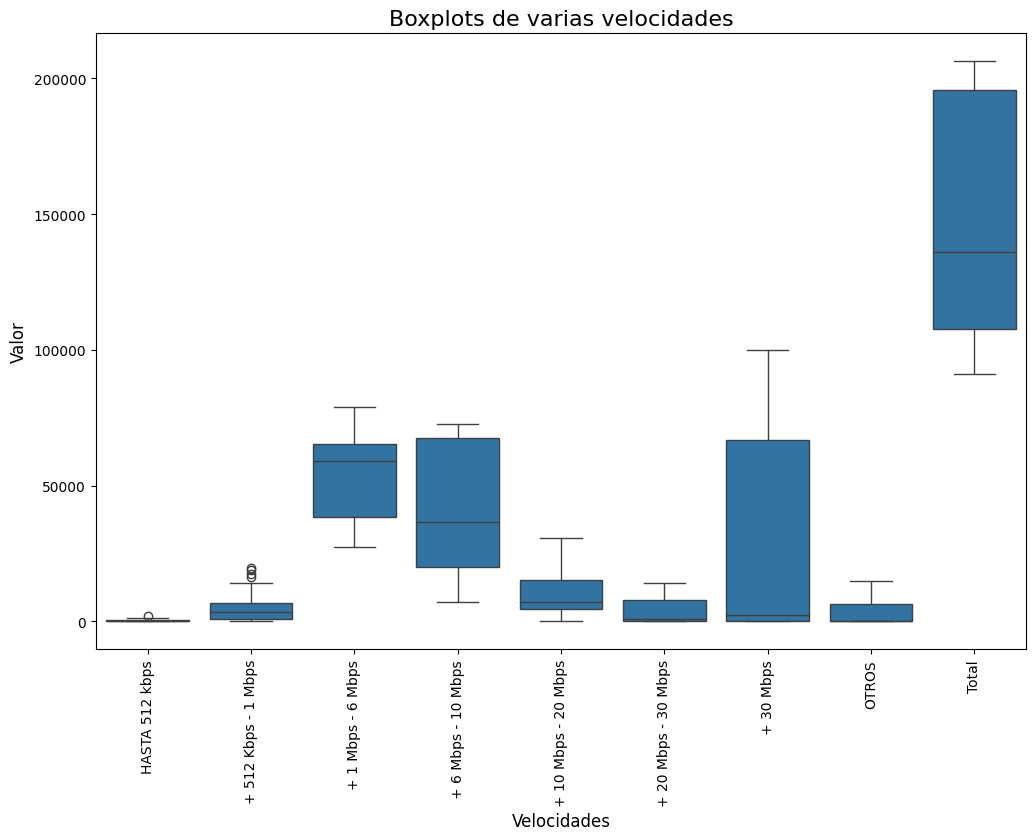

In [76]:
datos_2 =df_Acceso_rango_provincia[df_Acceso_rango_provincia['Provincia'] == 'Salta']
datos_2 = datos_2[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps','+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS', 'Total']]

# Crear un DataFrame en formato largo para generar boxplots combinados

df_melted = datos_2.melt()

# Generar un solo gráfico con boxplots de todas las columnas
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=df_melted)

# Añadir títulos y etiquetas
plt.title("Boxplots de varias velocidades", fontsize=16)
plt.xlabel("Velocidades", fontsize=12)
plt.ylabel("Valor", fontsize=12)

# Mostrar el gráfico
plt.xticks(rotation=90)
plt.show()

In [77]:
outlines_1 = detectar_outliers(datos_2, 'HASTA 512 kbps')
outlines_2 = detectar_outliers(datos_2, '+ 512 Kbps - 1 Mbps')

Los Outliers en la columna 'HASTA 512 kbps' tiene los indices:
 [760]
Los Outliers en la columna '+ 512 Kbps - 1 Mbps' tiene los indices:
 [904, 928, 952, 976]


In [78]:
#Corregir Outlies con Interpolacion
datos_2.loc[outlines_1,'HASTA 512 kbps'] = np.nan
df_Acceso_rango_provincia.loc[outlines_1,'HASTA 512 kbps'] = datos_2["HASTA 512 kbps"].interpolate()

<span style="color: rgb(94,154,171); font-size: 13px;">**SAN JUAN**</span>

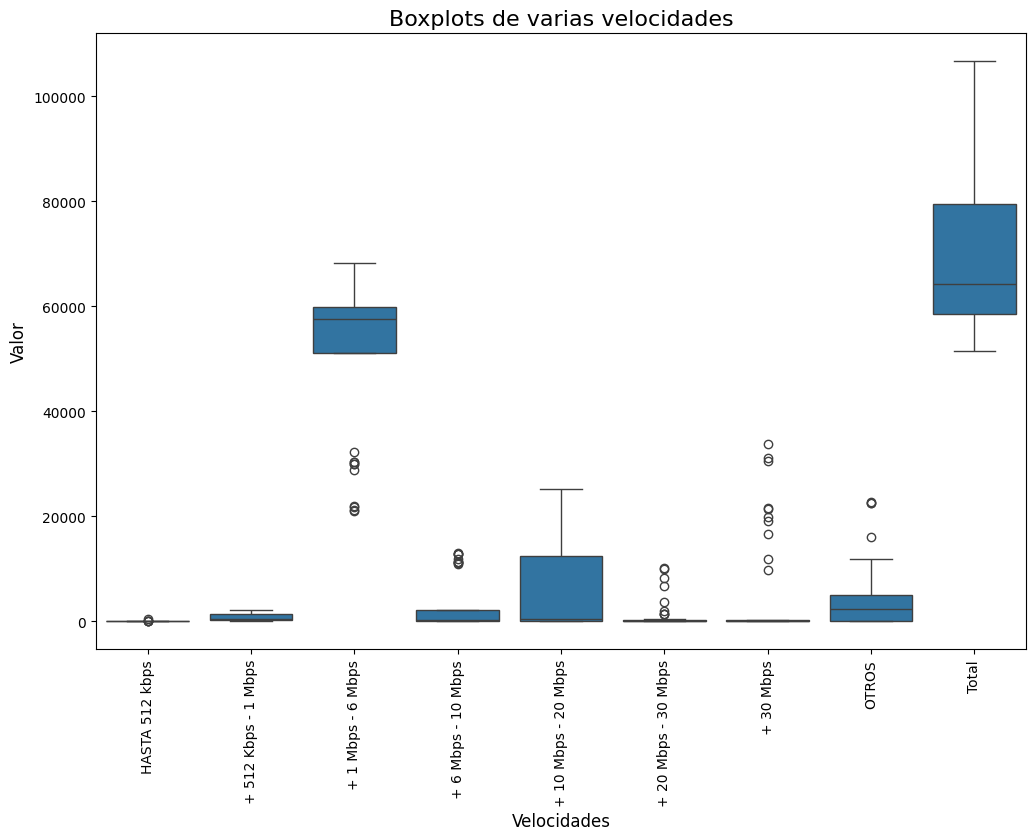

In [79]:
datos_2 =df_Acceso_rango_provincia[df_Acceso_rango_provincia['Provincia'] == 'San Juan']
datos_2 = datos_2[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps','+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS', 'Total']]

# Crear un DataFrame en formato largo para generar boxplots combinados

df_melted = datos_2.melt()

# Generar un solo gráfico con boxplots de todas las columnas
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=df_melted)

# Añadir títulos y etiquetas
plt.title("Boxplots de varias velocidades", fontsize=16)
plt.xlabel("Velocidades", fontsize=12)
plt.ylabel("Valor", fontsize=12)

# Mostrar el gráfico
plt.xticks(rotation=90)
plt.show()

In [80]:
outlines_1 = detectar_outliers(datos_2, 'HASTA 512 kbps')
outlines_2 = detectar_outliers(datos_2, '+ 1 Mbps - 6 Mbps')
outlines_3 = detectar_outliers(datos_2, '+ 6 Mbps - 10 Mbps')
outlines_4 = detectar_outliers(datos_2, '+ 20 Mbps - 30 Mbps')
outlines_5 = detectar_outliers(datos_2, '+ 30 Mbps')
outlines_3 = detectar_outliers(datos_2, 'OTROS')

Los Outliers en la columna 'HASTA 512 kbps' tiene los indices:
 [353, 377, 401, 425, 977]
Los Outliers en la columna '+ 1 Mbps - 6 Mbps' tiene los indices:
 [17, 41, 65, 89, 113, 137, 161, 185, 209, 233]
Los Outliers en la columna '+ 6 Mbps - 10 Mbps' tiene los indices:
 [17, 41, 65, 89, 113, 137, 161, 185, 209, 233]
Los Outliers en la columna '+ 20 Mbps - 30 Mbps' tiene los indices:
 [17, 41, 65, 89, 113, 137, 161, 185, 209]
Los Outliers en la columna '+ 30 Mbps' tiene los indices:
 [17, 41, 65, 89, 113, 137, 161, 185, 209, 233]
Los Outliers en la columna 'OTROS' tiene los indices:
 [17, 41, 65, 89]


In [81]:
#Corregir Outlier
df_Acceso_rango_provincia.loc[outlines_1[-1],'HASTA 512 kbps'] = datos_2["HASTA 512 kbps"].mean()

<span style="color: rgb(94,154,171); font-size: 13px;">**SAN LUIS**</span>

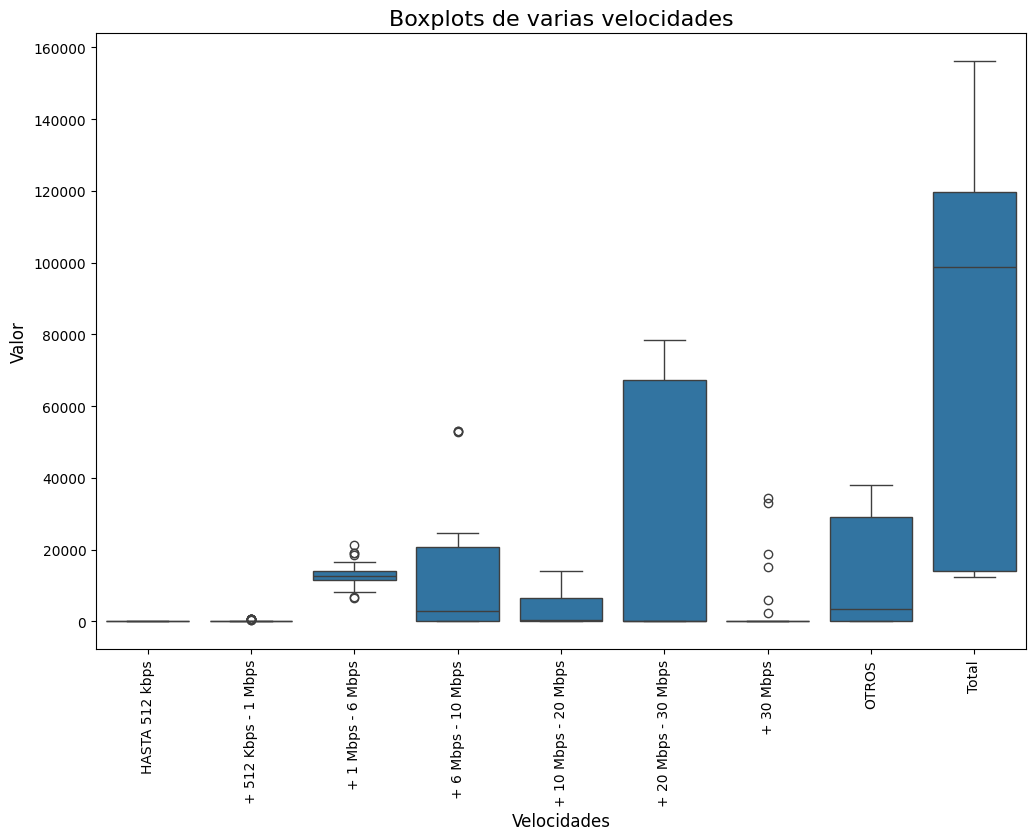

In [82]:
datos_2 =df_Acceso_rango_provincia[df_Acceso_rango_provincia['Provincia'] == 'San Luis']
datos_2 = datos_2[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps','+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS', 'Total']]

# Crear un DataFrame en formato largo para generar boxplots combinados

df_melted = datos_2.melt()

# Generar un solo gráfico con boxplots de todas las columnas
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=df_melted)

# Añadir títulos y etiquetas
plt.title("Boxplots de varias velocidades", fontsize=16)
plt.xlabel("Velocidades", fontsize=12)
plt.ylabel("Valor", fontsize=12)

# Mostrar el gráfico
plt.xticks(rotation=90)
plt.show()

In [83]:
outlines_1 = detectar_outliers(datos_2, '+ 512 Kbps - 1 Mbps')
outlines_2 = detectar_outliers(datos_2, '+ 1 Mbps - 6 Mbps')
outlines_3 = detectar_outliers(datos_2, '+ 6 Mbps - 10 Mbps')
outlines_4 = detectar_outliers(datos_2, '+ 30 Mbps')

Los Outliers en la columna '+ 512 Kbps - 1 Mbps' tiene los indices:
 [18, 42, 66, 90, 114, 138, 162, 186, 210]
Los Outliers en la columna '+ 1 Mbps - 6 Mbps' tiene los indices:
 [162, 186, 450, 498, 522, 546]
Los Outliers en la columna '+ 6 Mbps - 10 Mbps' tiene los indices:
 [498, 522, 546]
Los Outliers en la columna '+ 30 Mbps' tiene los indices:
 [18, 42, 66, 90, 114, 138]


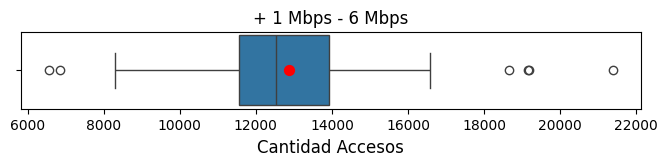

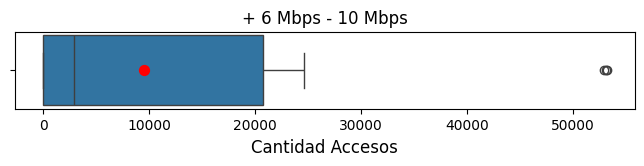

In [84]:
plt.figure(figsize=(8, 1))
sns.boxplot(data=datos_2, x='+ 1 Mbps - 6 Mbps', orient='h')
media = datos_2['+ 1 Mbps - 6 Mbps'].mean()
plt.scatter(media, 0, color='red', label='Media', zorder=3, s=50, marker='o')
plt.xlabel("Cantidad Accesos", fontsize=12)
plt.title('+ 1 Mbps - 6 Mbps')
plt.show()

plt.figure(figsize=(8, 1))
sns.boxplot(data=datos_2, x='+ 6 Mbps - 10 Mbps', orient='h')
media = datos_2['+ 6 Mbps - 10 Mbps'].mean()
plt.scatter(media, 0, color='red', label='Media', zorder=3, s=50, marker='o')
plt.xlabel("Cantidad Accesos", fontsize=12)
plt.title('+ 6 Mbps - 10 Mbps')
plt.show()




In [85]:
#Corregir Outlier
df_Acceso_rango_provincia.loc[outlines_2,'+ 1 Mbps - 6 Mbps'] = datos_2['+ 1 Mbps - 6 Mbps'].mean()
df_Acceso_rango_provincia.loc[outlines_3,'+ 6 Mbps - 10 Mbps'] = datos_2['+ 6 Mbps - 10 Mbps'].mean()

<span style="color: rgb(94,154,171); font-size: 13px;">**SANTA CRUZ**</span>

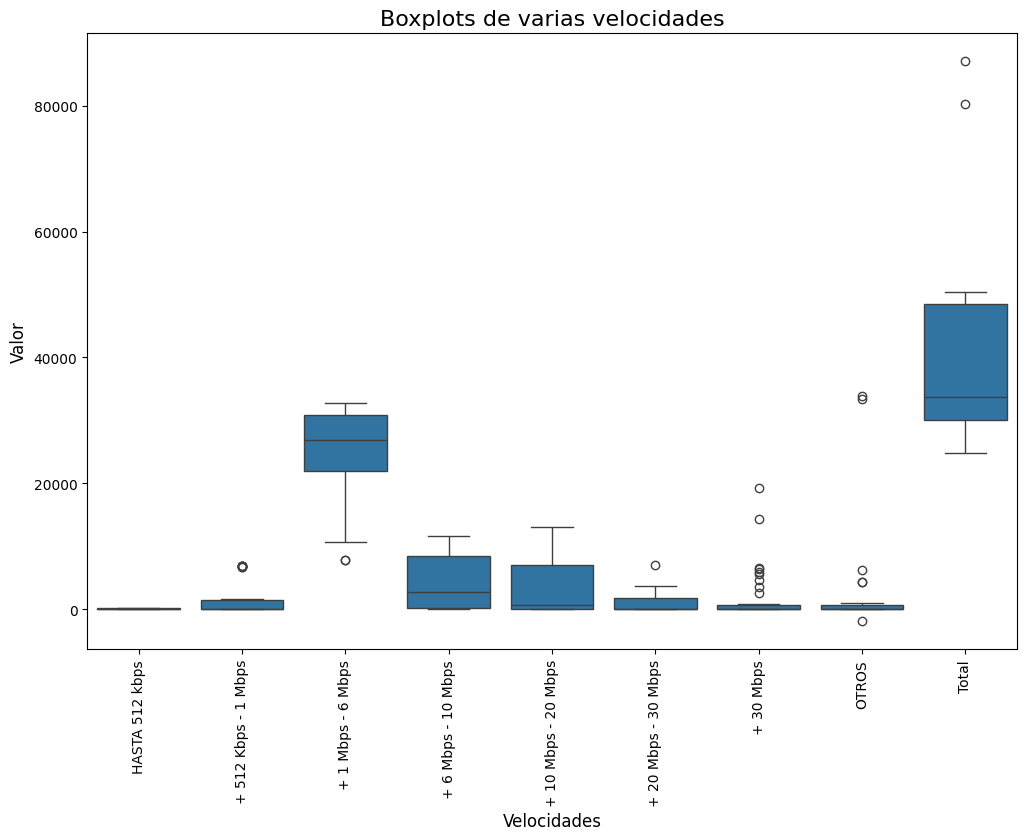

In [86]:
datos_2 =df_Acceso_rango_provincia[df_Acceso_rango_provincia['Provincia'] == 'Santa Cruz']
datos_2 = datos_2[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps','+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS', 'Total']]

# Crear un DataFrame en formato largo para generar boxplots combinados

df_melted = datos_2.melt()

# Generar un solo gráfico con boxplots de todas las columnas
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=df_melted)

# Añadir títulos y etiquetas
plt.title("Boxplots de varias velocidades", fontsize=16)
plt.xlabel("Velocidades", fontsize=12)
plt.ylabel("Valor", fontsize=12)

# Mostrar el gráfico
plt.xticks(rotation=90)
plt.show()

In [87]:
outlines_1 = detectar_outliers(datos_2, '+ 512 Kbps - 1 Mbps')
outlines_2 = detectar_outliers(datos_2, '+ 1 Mbps - 6 Mbps')
outlines_3 = detectar_outliers(datos_2, '+ 20 Mbps - 30 Mbps')
outlines_4 = detectar_outliers(datos_2, '+ 30 Mbps')
outlines_5 = detectar_outliers(datos_2, 'OTROS')
outlines_6 = detectar_outliers(datos_2, 'Total')

Los Outliers en la columna '+ 512 Kbps - 1 Mbps' tiene los indices:
 [67, 91, 115, 139, 163, 187, 211]
Los Outliers en la columna '+ 1 Mbps - 6 Mbps' tiene los indices:
 [19, 43]
Los Outliers en la columna '+ 20 Mbps - 30 Mbps' tiene los indices:
 [19]
Los Outliers en la columna '+ 30 Mbps' tiene los indices:
 [19, 43, 67, 91, 115, 139, 163, 187, 211]
Los Outliers en la columna 'OTROS' tiene los indices:
 [19, 43, 307, 475, 571, 595]
Los Outliers en la columna 'Total' tiene los indices:
 [19, 43]


<span style="color: rgb(94,154,171); font-size: 13px;">**SANTA FE**</span>

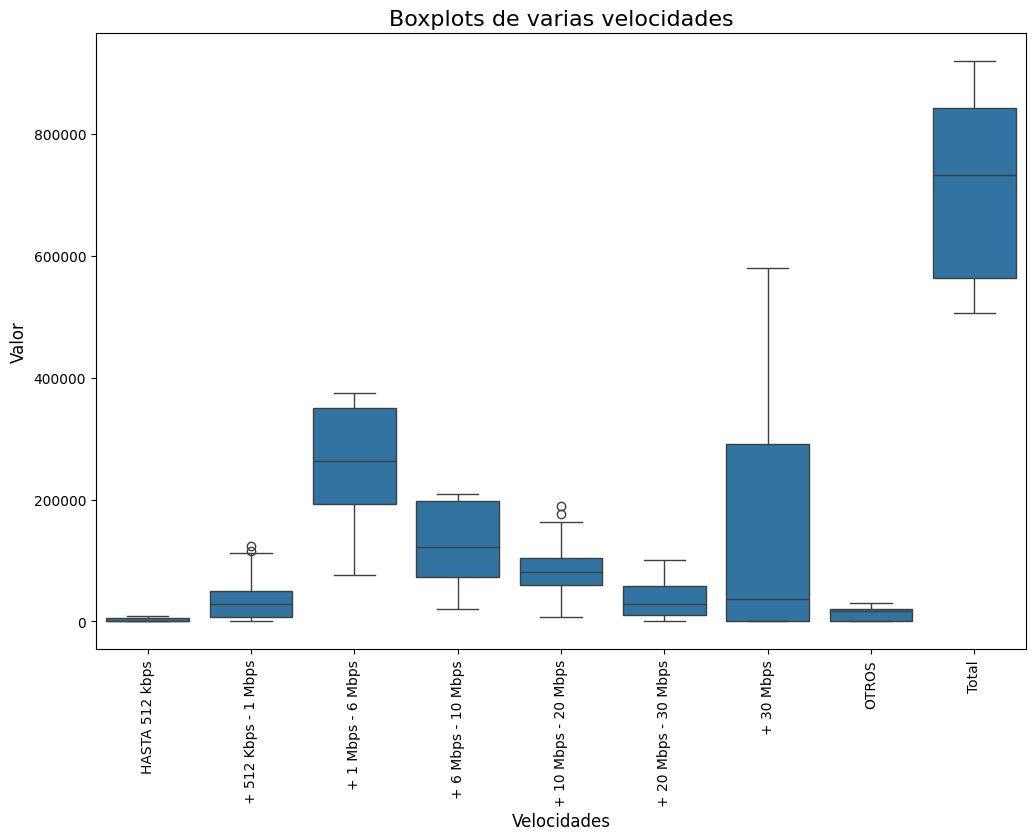

In [88]:
datos_2 =df_Acceso_rango_provincia[df_Acceso_rango_provincia['Provincia'] == 'Santa Fe']
datos_2 = datos_2[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps','+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS', 'Total']]

# Crear un DataFrame en formato largo para generar boxplots combinados

df_melted = datos_2.melt()

# Generar un solo gráfico con boxplots de todas las columnas
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=df_melted)

# Añadir títulos y etiquetas
plt.title("Boxplots de varias velocidades", fontsize=16)
plt.xlabel("Velocidades", fontsize=12)
plt.ylabel("Valor", fontsize=12)

# Mostrar el gráfico
plt.xticks(rotation=90)
plt.show()

In [89]:
outlines_1 = detectar_outliers(datos_2, '+ 512 Kbps - 1 Mbps')
outlines_2 = detectar_outliers(datos_2, '+ 10 Mbps - 20 Mbps')

Los Outliers en la columna '+ 512 Kbps - 1 Mbps' tiene los indices:
 [956, 980]
Los Outliers en la columna '+ 10 Mbps - 20 Mbps' tiene los indices:
 [572, 596]


In [90]:
# No se Corregiran Outlier ya que al estar al comienzo y al final del periodo, tienen tendencia normal de subida y bajada

<span style="color: rgb(94,154,171); font-size: 13px;">**SANTIAGO DEL ESTERO**</span>

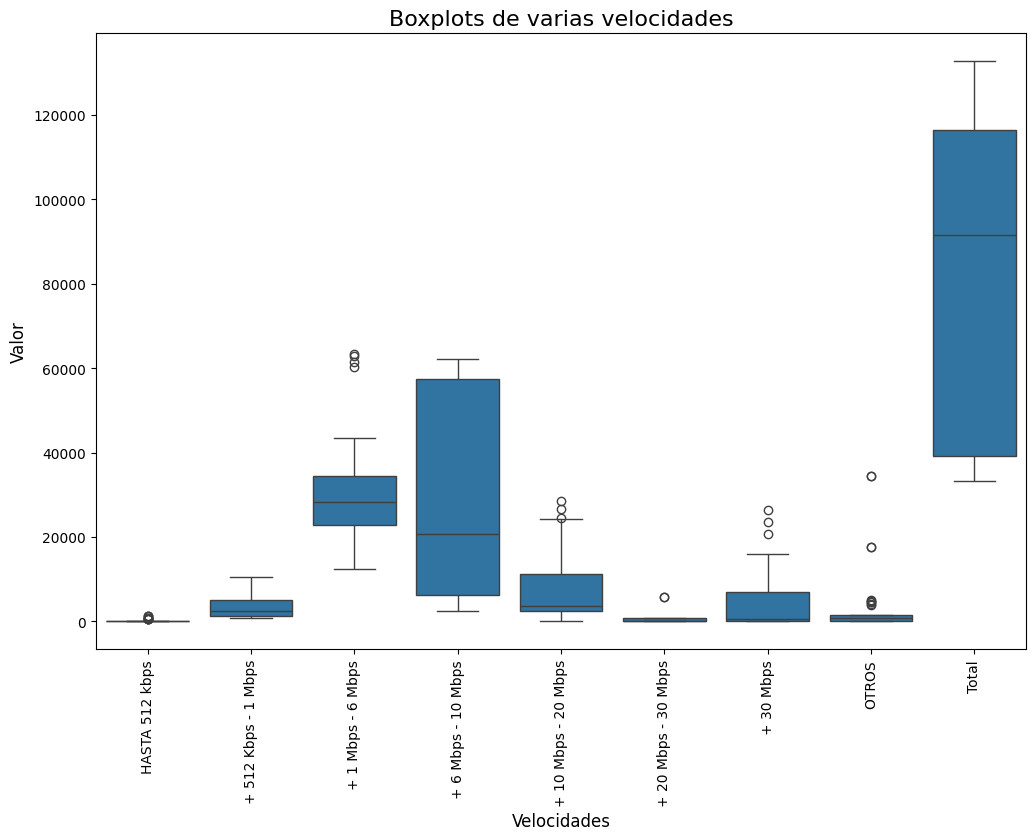

In [91]:
datos_2 =df_Acceso_rango_provincia[df_Acceso_rango_provincia['Provincia'] == 'Santiago Del Estero']
datos_2 = datos_2[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps','+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS', 'Total']]

# Crear un DataFrame en formato largo para generar boxplots combinados

df_melted = datos_2.melt()

# Generar un solo gráfico con boxplots de todas las columnas
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=df_melted)

# Añadir títulos y etiquetas
plt.title("Boxplots de varias velocidades", fontsize=16)
plt.xlabel("Velocidades", fontsize=12)
plt.ylabel("Valor", fontsize=12)

# Mostrar el gráfico
plt.xticks(rotation=90)
plt.show()

In [92]:
outlines_1 = detectar_outliers(datos_2, 'HASTA 512 kbps')
outlines_2 = detectar_outliers(datos_2, '+ 1 Mbps - 6 Mbps')
outlines_3 = detectar_outliers(datos_2, '+ 10 Mbps - 20 Mbps')
outlines_4 = detectar_outliers(datos_2, '+ 20 Mbps - 30 Mbps')
outlines_5 = detectar_outliers(datos_2, '+ 30 Mbps')
outlines_4 = detectar_outliers(datos_2, 'OTROS')

Los Outliers en la columna 'HASTA 512 kbps' tiene los indices:
 [765, 789, 813, 837, 861, 885, 909, 933, 957, 981]
Los Outliers en la columna '+ 1 Mbps - 6 Mbps' tiene los indices:
 [477, 501, 525, 549]
Los Outliers en la columna '+ 10 Mbps - 20 Mbps' tiene los indices:
 [45, 69, 93]
Los Outliers en la columna '+ 20 Mbps - 30 Mbps' tiene los indices:
 [21, 45]
Los Outliers en la columna '+ 30 Mbps' tiene los indices:
 [21, 45, 69]
Los Outliers en la columna 'OTROS' tiene los indices:
 [309, 333, 357, 381, 405, 429, 453, 477, 573, 597]


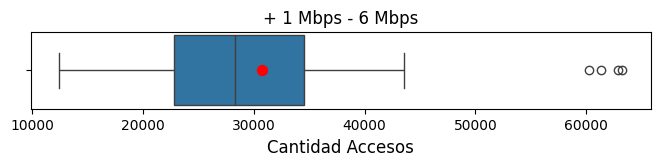

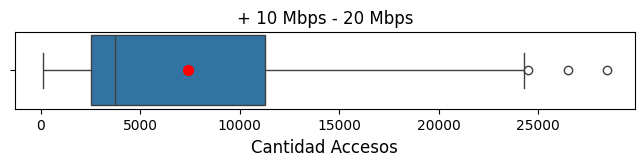

In [93]:
plt.figure(figsize=(8, 1))
sns.boxplot(data=datos_2, x='+ 1 Mbps - 6 Mbps', orient='h')
media = datos_2['+ 1 Mbps - 6 Mbps'].mean()
plt.scatter(media, 0, color='red', label='Media', zorder=3, s=50, marker='o')
plt.xlabel("Cantidad Accesos", fontsize=12)
plt.title('+ 1 Mbps - 6 Mbps')
plt.show()

plt.figure(figsize=(8, 1))
sns.boxplot(data=datos_2, x='+ 10 Mbps - 20 Mbps', orient='h')
media = datos_2['+ 10 Mbps - 20 Mbps'].mean()
plt.scatter(media, 0, color='red', label='Media', zorder=3, s=50, marker='o')
plt.xlabel("Cantidad Accesos", fontsize=12)
plt.title('+ 10 Mbps - 20 Mbps')
plt.show()





In [94]:
#Corregir Outlier
datos_2.loc[outlines_2,'+ 1 Mbps - 6 Mbps'] = np.nan
df_Acceso_rango_provincia.loc[outlines_2,'+ 1 Mbps - 6 Mbps'] = datos_2['+ 1 Mbps - 6 Mbps'].interpolate()

#Corregir Outlier
datos_2.loc[outlines_3,'+ 10 Mbps - 20 Mbps'] = np.nan
df_Acceso_rango_provincia.loc[outlines_3,'+ 10 Mbps - 20 Mbps'] = datos_2['+ 10 Mbps - 20 Mbps'].interpolate()

<span style="color: rgb(94,154,171); font-size: 13px;">**TIERRA DEL FUEGO**</span>

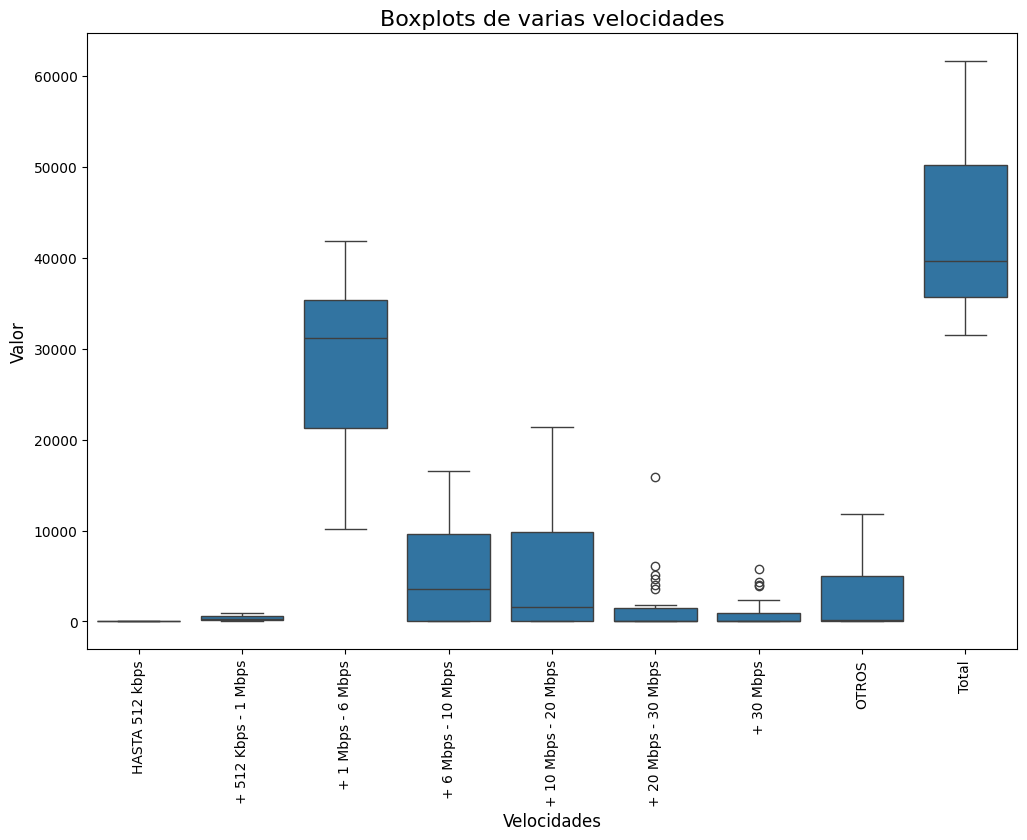

In [95]:
datos_2 =df_Acceso_rango_provincia[df_Acceso_rango_provincia['Provincia'] == 'Tierra Del Fuego']
datos_2 = datos_2[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps','+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS', 'Total']]

# Crear un DataFrame en formato largo para generar boxplots combinados

df_melted = datos_2.melt()

# Generar un solo gráfico con boxplots de todas las columnas
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=df_melted)

# Añadir títulos y etiquetas
plt.title("Boxplots de varias velocidades", fontsize=16)
plt.xlabel("Velocidades", fontsize=12)
plt.ylabel("Valor", fontsize=12)

# Mostrar el gráfico
plt.xticks(rotation=90)
plt.show()

In [96]:
outlines_1 = detectar_outliers(datos_2, '+ 20 Mbps - 30 Mbps')
outlines_2 = detectar_outliers(datos_2, '+ 30 Mbps')

Los Outliers en la columna '+ 20 Mbps - 30 Mbps' tiene los indices:
 [22, 46, 70, 94, 118, 142]
Los Outliers en la columna '+ 30 Mbps' tiene los indices:
 [22, 46, 70, 94]


<span style="color: rgb(94,154,171); font-size: 13px;">**TUCUMAN**</span>

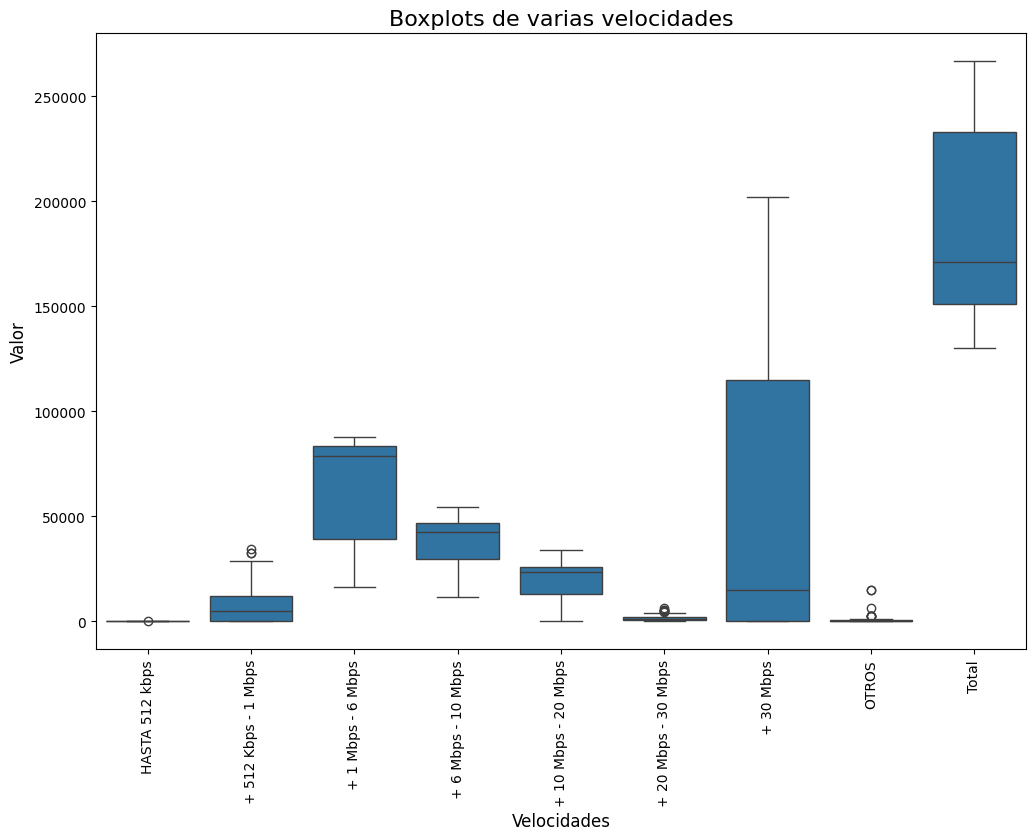

In [97]:
datos_2 =df_Acceso_rango_provincia[df_Acceso_rango_provincia['Provincia'] == 'Tucumán']
datos_2 = datos_2[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps','+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS', 'Total']]

# Crear un DataFrame en formato largo para generar boxplots combinados

df_melted = datos_2.melt()

# Generar un solo gráfico con boxplots de todas las columnas
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=df_melted)

# Añadir títulos y etiquetas
plt.title("Boxplots de varias velocidades", fontsize=16)
plt.xlabel("Velocidades", fontsize=12)
plt.ylabel("Valor", fontsize=12)

# Mostrar el gráfico
plt.xticks(rotation=90)
plt.show()

In [98]:
outlines_1 = detectar_outliers(datos_2, '+ 512 Kbps - 1 Mbps')
outlines_2 = detectar_outliers(datos_2, '+ 20 Mbps - 30 Mbps')
outlines_3 = detectar_outliers(datos_2, 'OTROS')

Los Outliers en la columna '+ 512 Kbps - 1 Mbps' tiene los indices:
 [935, 959, 983]
Los Outliers en la columna '+ 20 Mbps - 30 Mbps' tiene los indices:
 [167, 191, 215, 239, 263, 287, 431]
Los Outliers en la columna 'OTROS' tiene los indices:
 [119, 143, 287, 311, 335, 359, 383, 479]


In [99]:
df_vel_media_provincia

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2024,1,Buenos Aires,159.130000
1,2024,1,Capital Federal,229.940000
2,2024,1,Catamarca,91.450000
3,2024,1,Chaco,107.510000
4,2024,1,Chubut,20.500000
...,...,...,...,...
979,2014,1,Santa Cruz,3.315991
980,2014,1,Santa Fe,3.147407
981,2014,1,Santiago Del Estero,2.949472
982,2014,1,Tierra Del Fuego,3.446888


<span style="color:  	rgb(59,134,150); font-size: 18px;">**VELOCIDAD MEDIA POR PROVINCIA**</span>

In [100]:
print(df_vel_media_provincia.shape)
print(df_vel_media_provincia.info())

(984, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     984 non-null    int64  
 1   Trimestre               984 non-null    int64  
 2   Provincia               984 non-null    object 
 3   Mbps (Media de bajada)  984 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.9+ KB
None


In [101]:
df_vel_media_provincia.isnull().sum()

Año                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
dtype: int64

In [102]:
## Combinar Columnas Año y Trimestre a columna Fecha tipo datetime
df_vel_media_provincia['Fecha'] = pd.to_datetime(df_vel_media_provincia['Año'].astype(str) + '-' + (df_vel_media_provincia['Trimestre']*3-2).astype(str) + '-1')
df_vel_media_provincia.drop(columns=['Año','Trimestre'], inplace=True)

In [103]:
#redondeo a dos cifras decimales de la velocidad media
df_vel_media_provincia.loc[:,'Mbps (Media de bajada)']= df_vel_media_provincia['Mbps (Media de bajada)'].round(2)

In [104]:
df_vel_media_provincia

,Provincia,Mbps (Media de bajada),Fecha
0,Buenos Aires,159.13,2024-01-01
1,Capital Federal,229.94,2024-01-01
2,Catamarca,91.45,2024-01-01
3,Chaco,107.51,2024-01-01
4,Chubut,20.50,2024-01-01
...,...,...,...
979,Santa Cruz,3.32,2014-01-01
980,Santa Fe,3.15,2014-01-01
981,Santiago Del Estero,2.95,2014-01-01
982,Tierra Del Fuego,3.45,2014-01-01


In [105]:
#Reorganizar el dataframe con las provincias como columnas
df_pivot = df_vel_media_provincia.pivot(index='Fecha', columns='Provincia', values= 'Mbps (Media de bajada)')

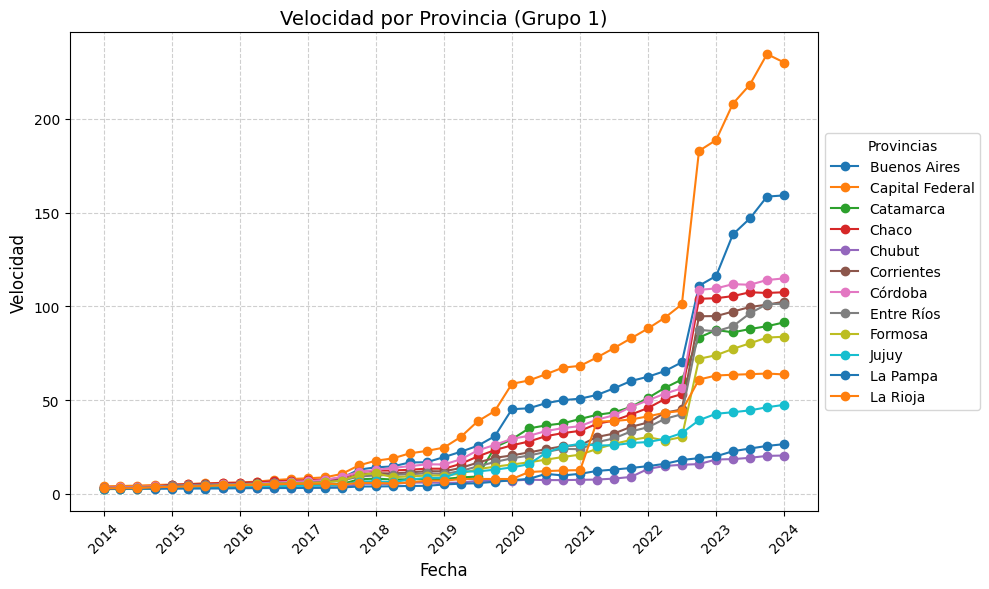

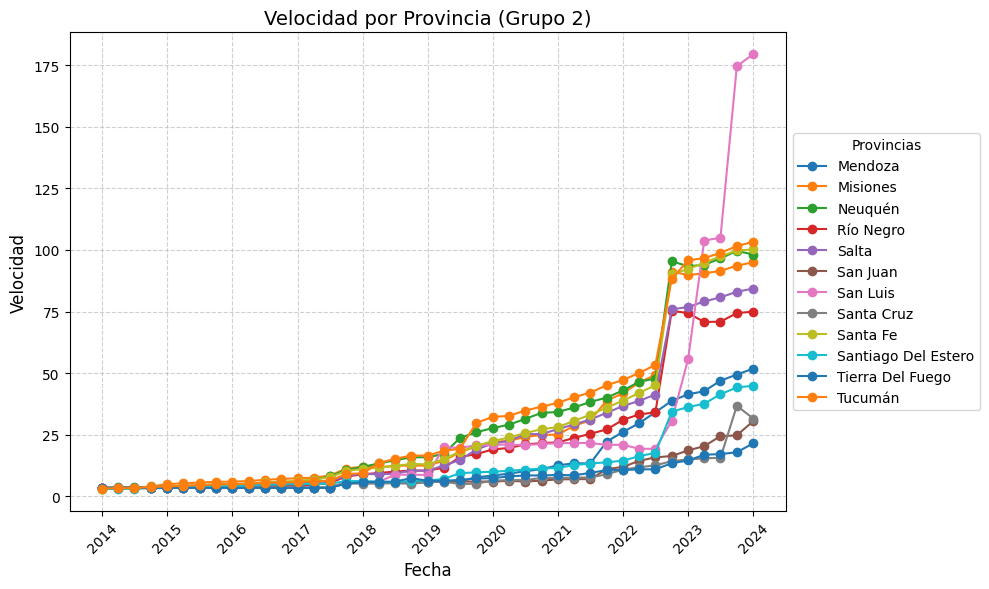

In [106]:
#Dividir en dos grupos las provincias para graficar las tendencias de crecimiento y observar si hay valores atipicos 
provincias = df_pivot.columns
grupo1 = provincias[:len(provincias) // 2]
grupo2 = provincias[len(provincias) // 2:]

# Crear el primer gráfico
plt.figure(figsize=(10, 6))
for provincia in grupo1:
    plt.plot(df_pivot.index, df_pivot[provincia], marker='o', label=provincia)
plt.title("Velocidad por Provincia (Grupo 1)", fontsize=14)
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Velocidad", fontsize=12)
plt.legend(title="Provincias", loc="center left", bbox_to_anchor=(1, 0.5))
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Crear el segundo gráfico
plt.figure(figsize=(10, 6))
for provincia in grupo2:
    plt.plot(df_pivot.index, df_pivot[provincia], marker='o', label=provincia)
plt.title("Velocidad por Provincia (Grupo 2)", fontsize=14)
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Velocidad", fontsize=12)
plt.legend(title="Provincias", loc="center left", bbox_to_anchor=(1, 0.5))
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<span style="color:  	rgb(59,134,150); font-size: 18px;">**TECNOLOGIAS POR PROVINCIA**</span>

In [107]:
print(df_tecnologia_provincia.shape)
print(df_tecnologia_provincia.info())

(986, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           985 non-null    object 
 1   Trimestre     985 non-null    object 
 2   Provincia     984 non-null    object 
 3   ADSL          984 non-null    float64
 4   Cablemodem    984 non-null    float64
 5   Fibra óptica  984 non-null    float64
 6   Wireless      984 non-null    float64
 7   Otros         984 non-null    float64
 8   Total         984 non-null    float64
dtypes: float64(6), object(3)
memory usage: 69.5+ KB
None


In [108]:
df_tecnologia_provincia.isnull().sum()

Año             1
Trimestre       1
Provincia       2
ADSL            2
Cablemodem      2
Fibra óptica    2
Wireless        2
Otros           2
Total           2
dtype: int64

In [109]:
df_tecnologia_provincia


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,1,Buenos Aires,203297.0,2790663.0,1799013.0,150290.0,101294.0,5044557.0
1,2024,1,Capital Federal,70108.0,1177475.0,203756.0,4493.0,48879.0,1504711.0
2,2024,1,Catamarca,5901.0,11025.0,56542.0,1384.0,81.0,74933.0
3,2024,1,Chaco,11343.0,58929.0,64463.0,8404.0,12404.0,155543.0
4,2024,1,Chubut,26306.0,77217.0,26356.0,30867.0,9930.0,170676.0
...,...,...,...,...,...,...,...,...,...
981,2014,1,Santiago Del Estero,32567.0,3598.0,19.0,915.0,34.0,37133.0
982,2014,1,Tierra Del Fuego,21618.0,2837.0,648.0,1.0,2934.0,28038.0
983,2014,1,Tucumán,129717.0,83.0,121.0,13.0,98.0,130032.0
984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
#Se eliminan las dos ultimas filas

df_tecnologia_provincia = df_tecnologia_provincia.drop(df_tecnologia_provincia.tail(2).index)

In [111]:
#se observa en el dataset valores con asteriscos

df_tecnologia_provincia['Año'] = df_tecnologia_provincia['Año'].replace({r'\*': ''}, regex=True)
df_tecnologia_provincia['Año'] = pd.to_numeric(df_tecnologia_provincia['Año'], errors='coerce')

df_tecnologia_provincia['Trimestre'] = df_tecnologia_provincia['Trimestre'].replace({r'\*': ''}, regex=True)
df_tecnologia_provincia['Trimestre'] = pd.to_numeric(df_tecnologia_provincia['Trimestre'], errors='coerce')

In [112]:
# Se convierte los valores a Numericos
df_tecnologia_provincia['Año'] = pd.to_numeric(df_tecnologia_provincia['Año'])
df_tecnologia_provincia['Trimestre'] = pd.to_numeric(df_tecnologia_provincia['Trimestre'])

In [113]:
#Combinar Columnas Año y Trimestre a columna Fecha tipo datetime
# Asegúrate de que las columnas sean enteros
df_tecnologia_provincia['Año'] = df_tecnologia_provincia['Año'].astype(int)
df_tecnologia_provincia['Trimestre'] = df_tecnologia_provincia['Trimestre'].astype(int)

df_tecnologia_provincia['Fecha'] = pd.to_datetime(df_tecnologia_provincia['Año'].astype(str) + '-' + (df_tecnologia_provincia['Trimestre'] * 3 - 2).astype(str) + '-1')

# Eliminar las columnas originales
df_tecnologia_provincia.drop(columns=['Año', 'Trimestre'], inplace=True)

In [114]:
df_tecnologia_provincia

,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Fecha
0,Buenos Aires,203297.0,2790663.0,1799013.0,150290.0,101294.0,5044557.0,2024-01-01
1,Capital Federal,70108.0,1177475.0,203756.0,4493.0,48879.0,1504711.0,2024-01-01
2,Catamarca,5901.0,11025.0,56542.0,1384.0,81.0,74933.0,2024-01-01
3,Chaco,11343.0,58929.0,64463.0,8404.0,12404.0,155543.0,2024-01-01
4,Chubut,26306.0,77217.0,26356.0,30867.0,9930.0,170676.0,2024-01-01
...,...,...,...,...,...,...,...,...
979,Santa Cruz,18927.0,100.0,381.0,4092.0,3264.0,26764.0,2014-01-01
980,Santa Fe,322662.0,174296.0,3059.0,5951.0,644.0,506612.0,2014-01-01
981,Santiago Del Estero,32567.0,3598.0,19.0,915.0,34.0,37133.0,2014-01-01
982,Tierra Del Fuego,21618.0,2837.0,648.0,1.0,2934.0,28038.0,2014-01-01


<span style="color: rgb(94,154,171); font-size: 16px;">**OUTLIERS**</span>



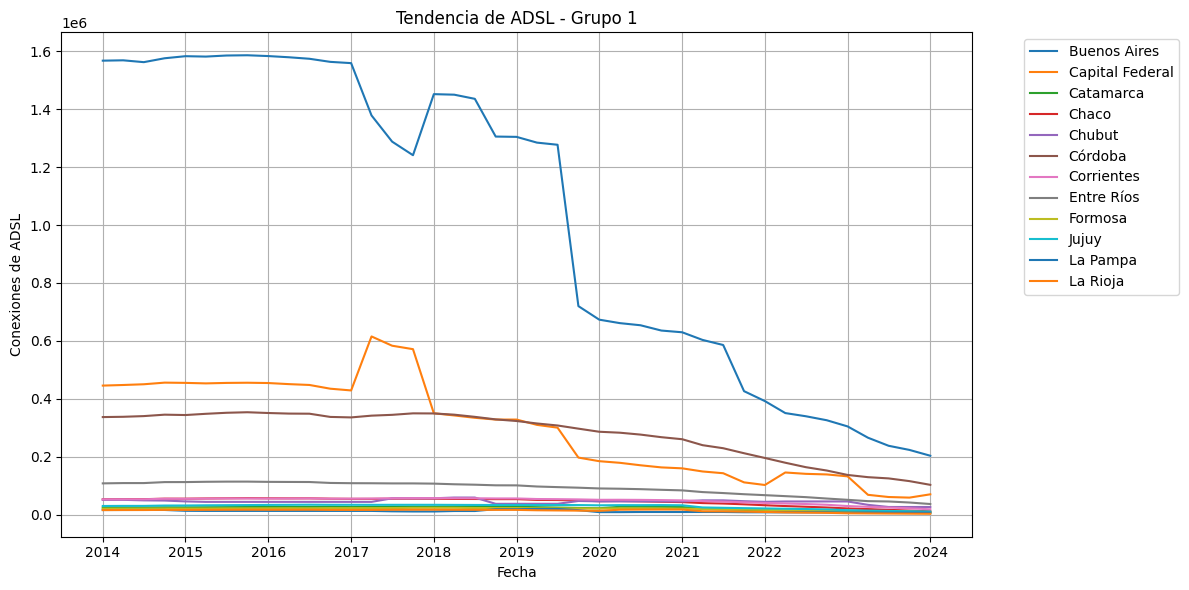

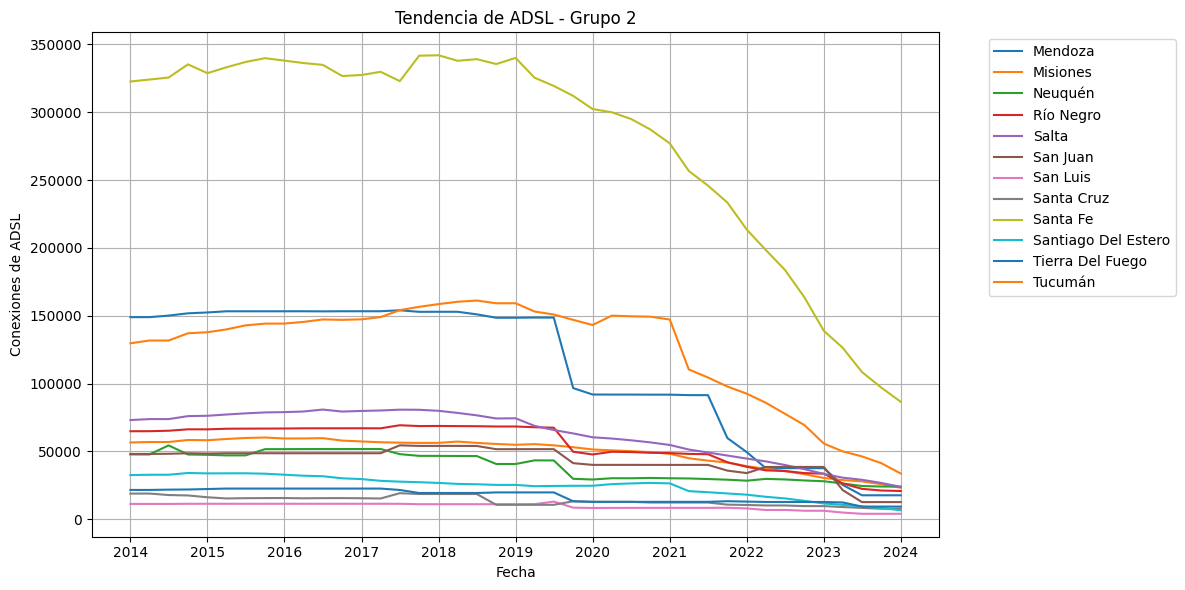

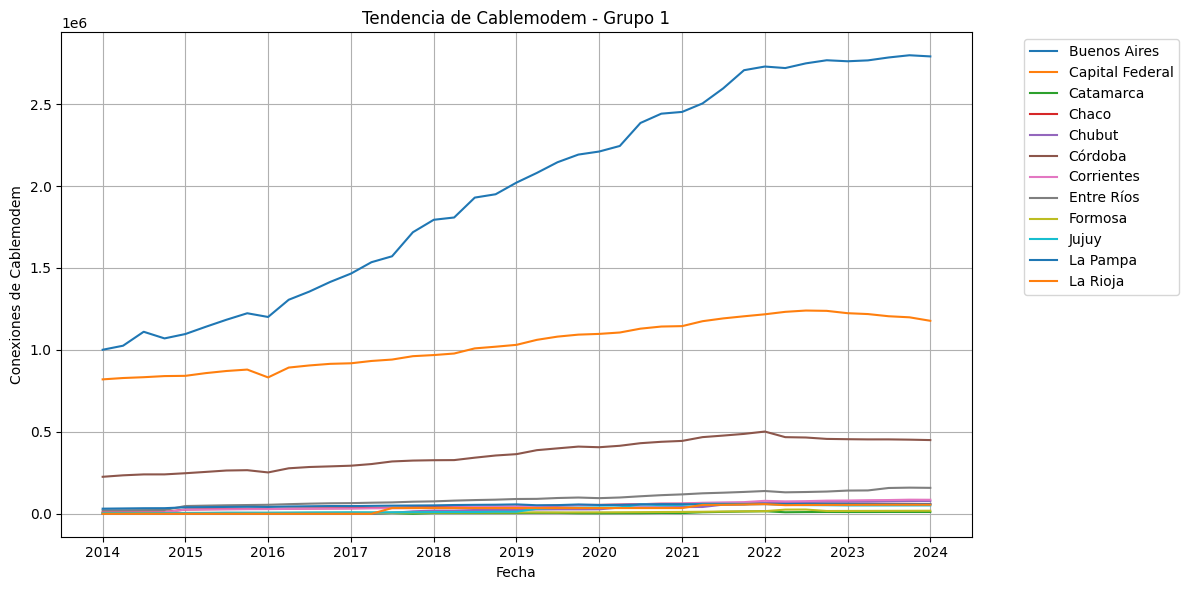

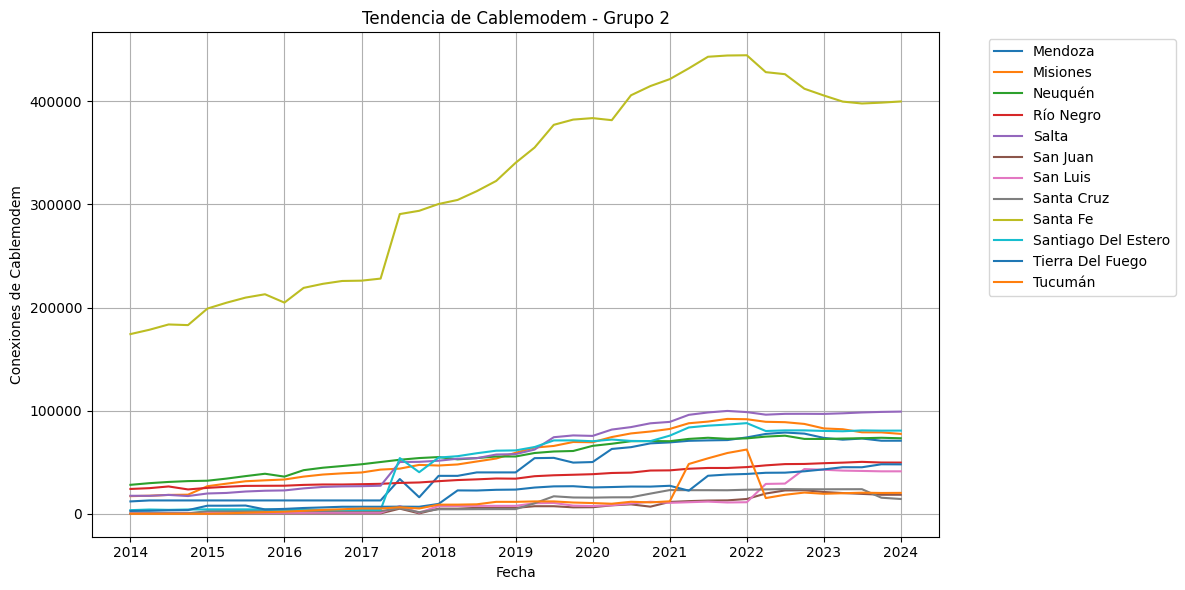

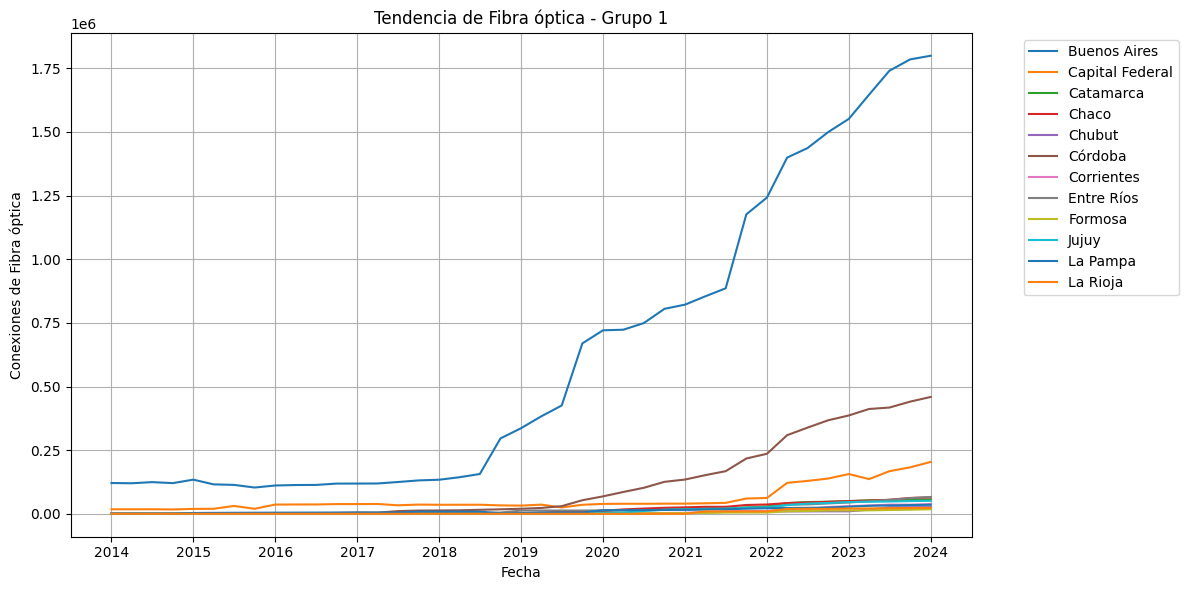

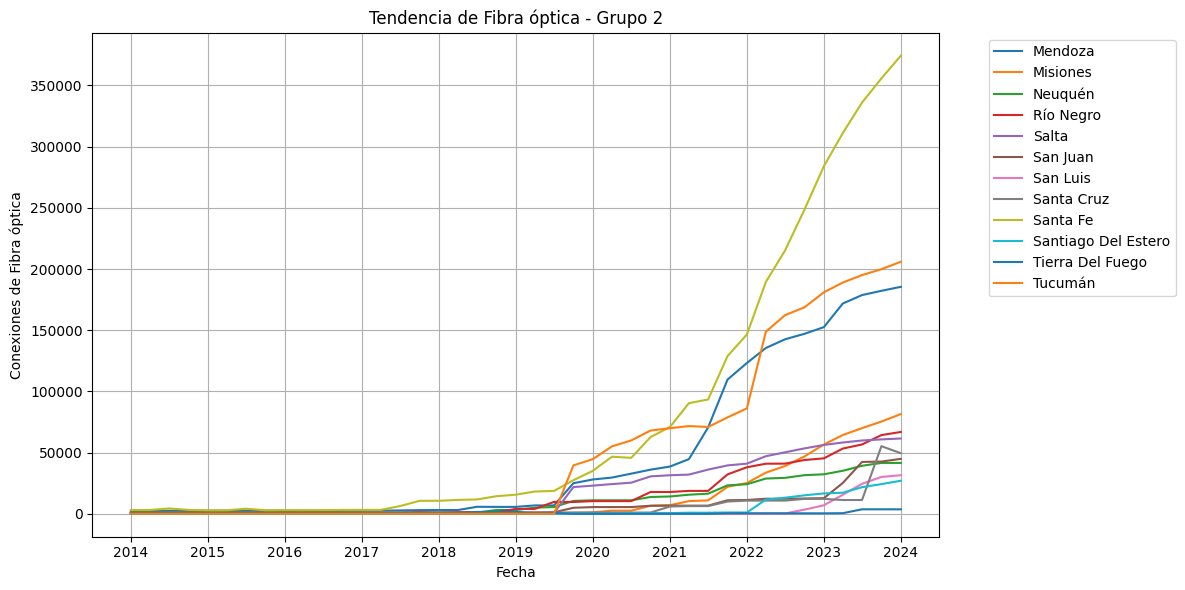

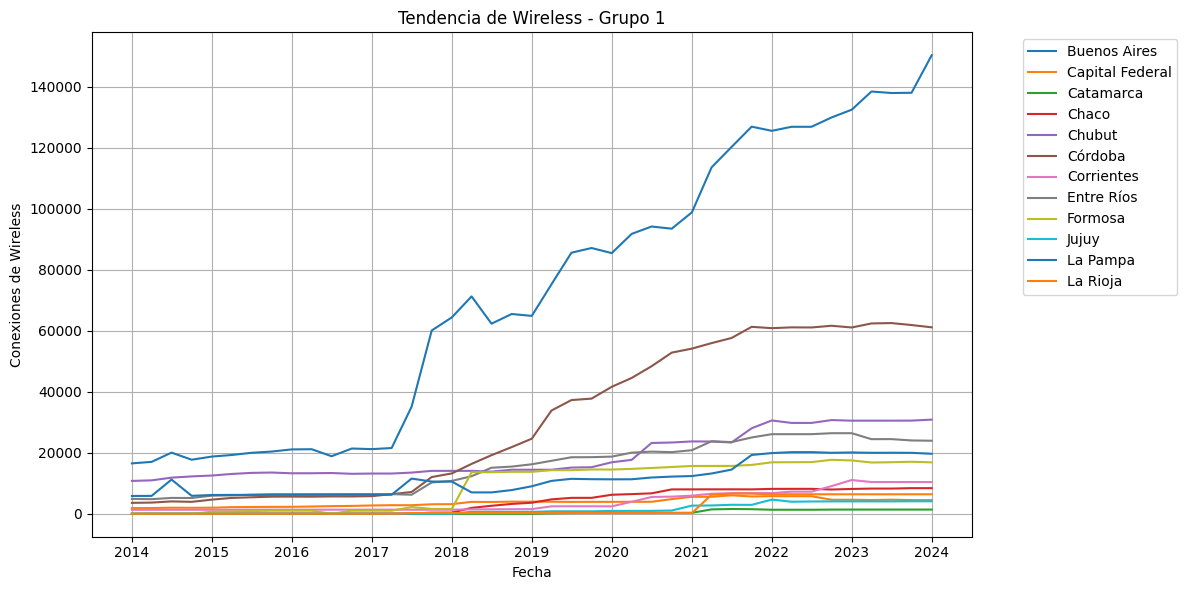

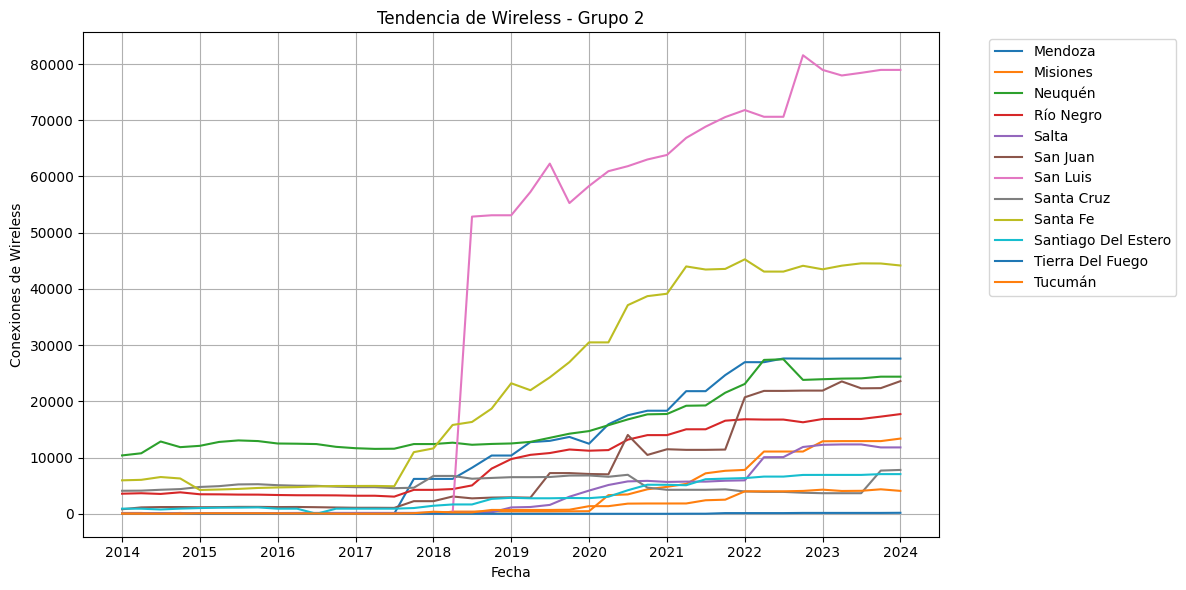

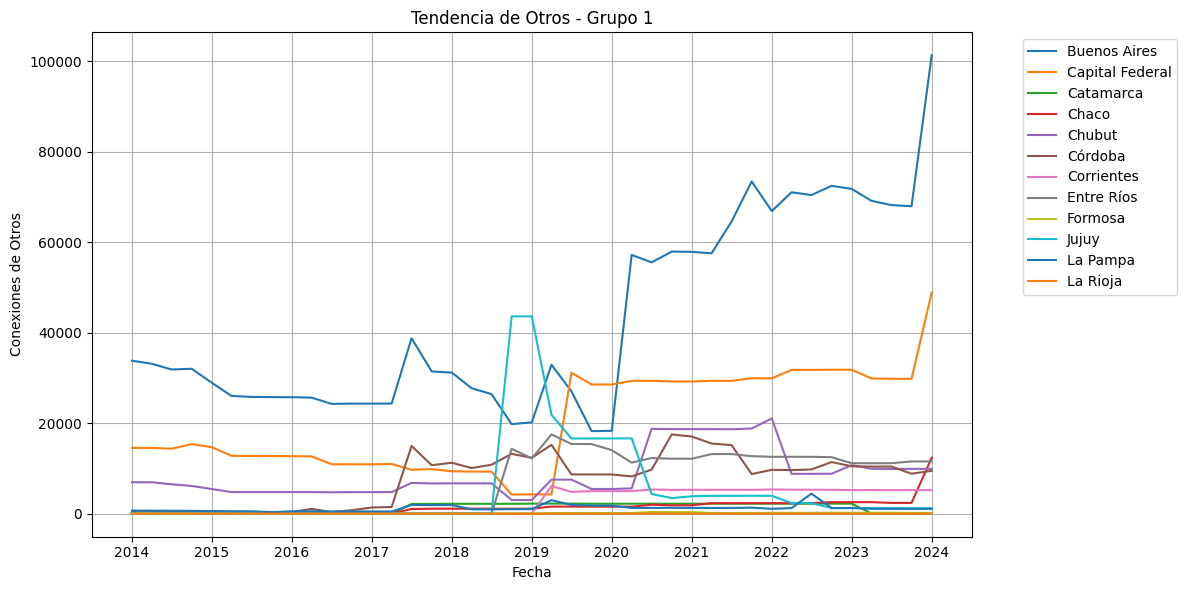

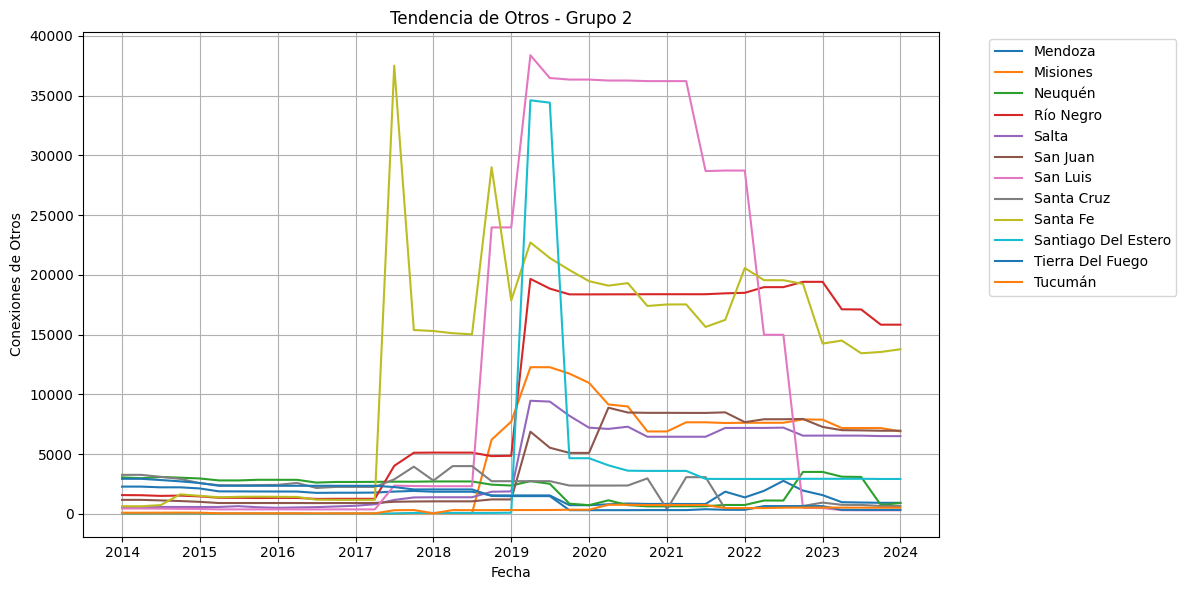

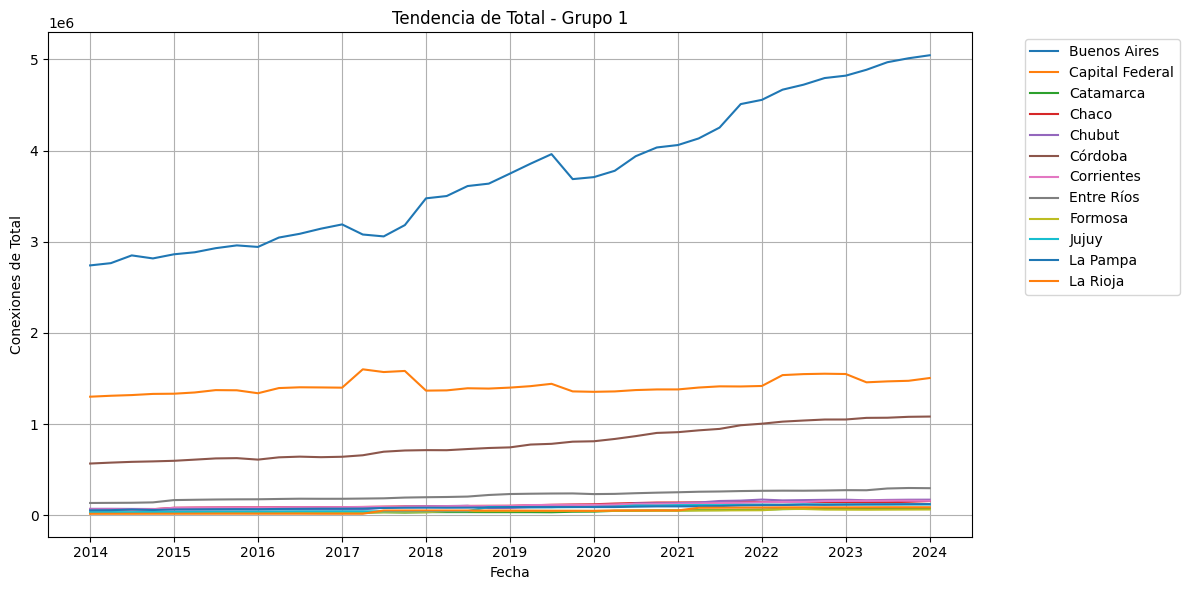

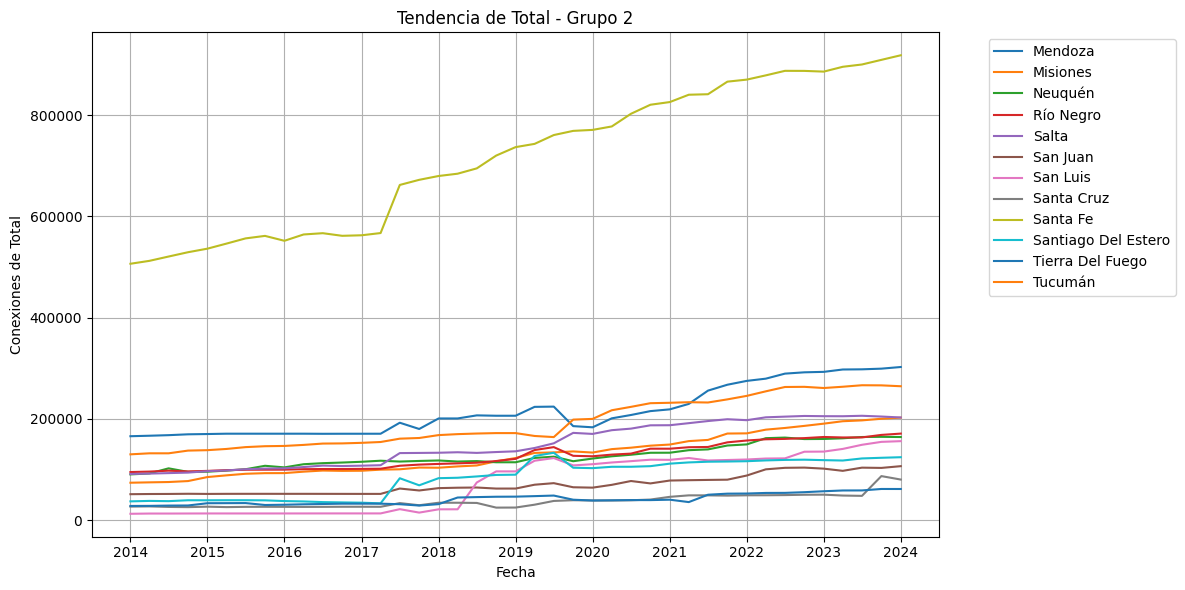

In [115]:
#SE graficaran las tendencias de tecnologias para observar outliers visualmente. se separaran las provincoias en dos Grupos
tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total' ]
data = df_tecnologia_provincia
# Dividir las provincias en dos grupos
provincias = data['Provincia'].unique()
grupo_1 = provincias[:len(provincias)//2]  # Primera mitad
grupo_2 = provincias[len(provincias)//2:]  # Segunda mitad

# Función para graficar un grupo de provincias
def graficar_tendencias(tecnologia, grupo_provincias, grupo_num):
    plt.figure(figsize=(12, 6))
    for provincia in grupo_provincias:
        provincia_data = data[data['Provincia'] == provincia]
        plt.plot(provincia_data['Fecha'], provincia_data[tecnologia], label=provincia)
    
    plt.title(f"Tendencia de {tecnologia} - Grupo {grupo_num}")
    plt.xlabel("Fecha")
    plt.ylabel(f"Conexiones de {tecnologia}")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Graficar por tecnología y por grupo de provincias
for tecnologia in tecnologias:
    graficar_tendencias(tecnologia, grupo_1, 1)
    graficar_tendencias(tecnologia, grupo_2, 2)

<span style="color:  	rgb(59,134,150); font-size: 18px;">**INGRESOS TOTALES**</span>

In [116]:
#Ver Forma y Caracteristicas de los datasets
print(df_ingresos_total.shape)
print(df_ingresos_total.info())

(41, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        41 non-null     int64  
 1   Trimestre                  41 non-null     int64  
 2   Ingresos (miles de pesos)  41 non-null     float64
 3   Periodo                    41 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB
None


In [117]:
## Combinar Columnas Año y Trimestre a columna Fecha tipo datetime
df_ingresos_total['Fecha'] = pd.to_datetime(df_ingresos_total['Año'].astype(str) + '-' + (df_ingresos_total['Trimestre']*3-2).astype(str) + '-1')
df_ingresos_total.drop(columns=['Año','Trimestre'], inplace=True)


In [118]:
# Redondear la columna 'Ingresos (miles de pesos)' a dos cifras decimales
df_ingresos_total['Ingresos (miles de pesos)'] = df_ingresos_total['Ingresos (miles de pesos)'].round(2)

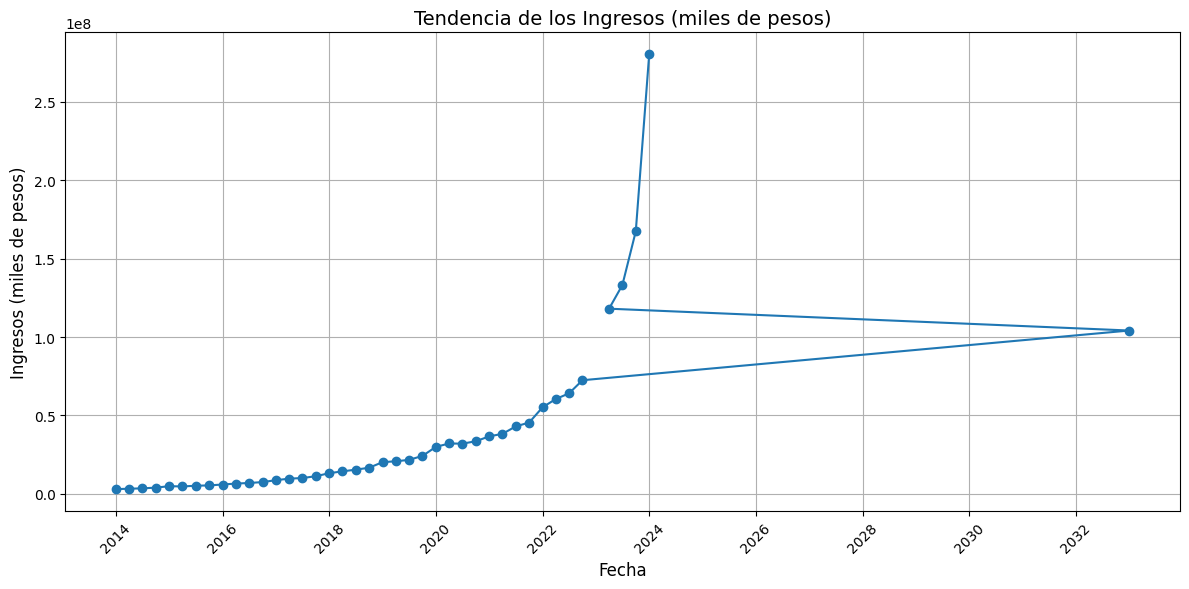

In [119]:
plt.figure(figsize=(12, 6))
plt.plot(df_ingresos_total['Fecha'], df_ingresos_total['Ingresos (miles de pesos)'], marker='o', linestyle='-')
plt.title('Tendencia de los Ingresos (miles de pesos)', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Ingresos (miles de pesos)', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [120]:
#Se observa un registro erroneo en el año

# Corregir el año en la fila 4
df_ingresos_total.loc[4, 'Fecha'] = pd.to_datetime('2023-01-01')



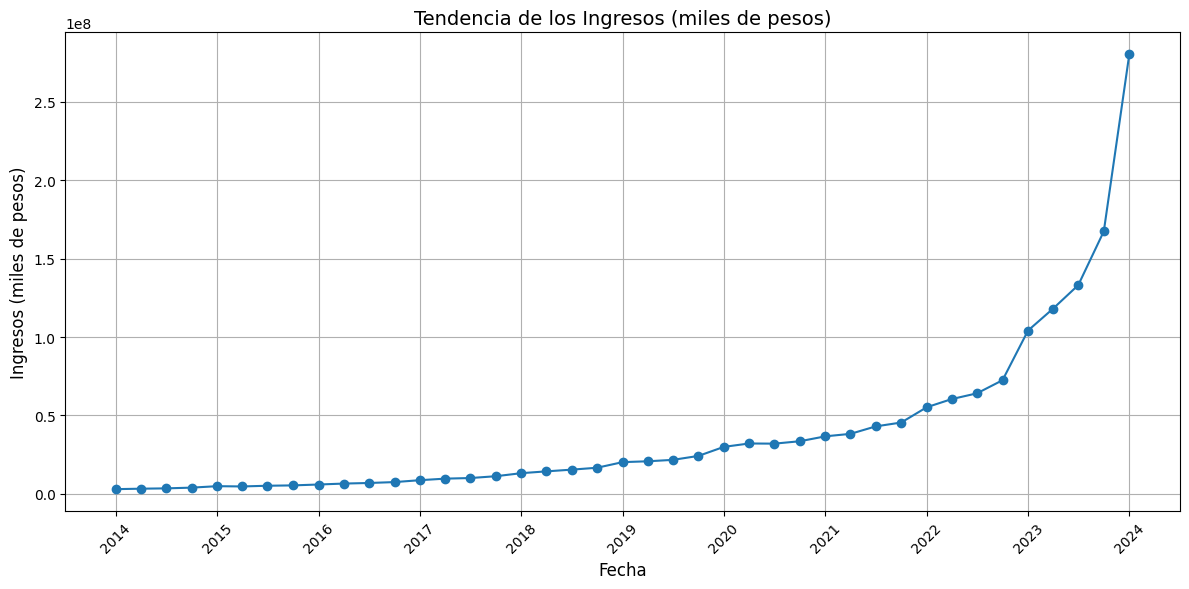

In [121]:
plt.figure(figsize=(12, 6))
plt.plot(df_ingresos_total['Fecha'], df_ingresos_total['Ingresos (miles de pesos)'], marker='o', linestyle='-')
plt.title('Tendencia de los Ingresos (miles de pesos)', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Ingresos (miles de pesos)', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [122]:
# Guardar los datasets


df_ingresos_total.to_csv('./Datasets/ingresos_total.csv', index=False)
df_vel_media_provincia.to_csv('./Datasets/vel_media_provincia.csv', index=False)
df_tecnologia_provincia.to_csv('./Datasets/tecnologia_provincia.csv', index=False)
df_penetracion_poblac.to_csv('./Datasets/penetracion_poblac.csv', index=False)
df_penetracion_hogar.to_csv('./Datasets/penetracion_hogar.csv', index=False)
df_Acceso_rango_provincia.to_csv('./Datasets/Acceso_rango_provincia.csv', index=False)
